Analisis de news en crudo

In [76]:
import pandas as pd
import os

tickers = ["AAPL", "MSFT", "NVDA", "TSLA", "META", "AMZN", "GOOG"]
base_path = r"C:\Users\Victor\Downloads\MSc DataScience\MasterThesis - GitHub\data\extract\news"

df_news_all = pd.DataFrame()

for ticker in tickers:
    file_path = os.path.join(base_path, f"{ticker}_news_2022-03-01_to_2025-05-01.csv")
    
    if os.path.exists(file_path):
        print(f"Cargando {file_path}")
        try:
            # Forzar separador ; y quotechar "
            df_temp = pd.read_csv(file_path, sep=";", quotechar='"', on_bad_lines='skip', engine='python')
            
            # Añadir columna ticker
            df_temp["ticker"] = ticker

            # Concatenar
            df_news_all = pd.concat([df_news_all, df_temp], ignore_index=True)
        except Exception as e:
            print(f"Error al cargar {ticker}: {e}")
    else:
        print(f"Archivo no encontrado: {file_path}")

# Mostrar las columnas correctas después de cargar
print(f"Total de columnas: {len(df_news_all.columns)}\n")
for i, col in enumerate(df_news_all.columns, start=1):
    print(f"{i:>2}. {col}")


Archivo no encontrado: C:\Users\Victor\Downloads\MSc DataScience\MasterThesis - GitHub\data\extract\news\AAPL_news_2022-03-01_to_2025-05-01.csv
Cargando C:\Users\Victor\Downloads\MSc DataScience\MasterThesis - GitHub\data\extract\news\MSFT_news_2022-03-01_to_2025-05-01.csv
Cargando C:\Users\Victor\Downloads\MSc DataScience\MasterThesis - GitHub\data\extract\news\NVDA_news_2022-03-01_to_2025-05-01.csv
Cargando C:\Users\Victor\Downloads\MSc DataScience\MasterThesis - GitHub\data\extract\news\TSLA_news_2022-03-01_to_2025-05-01.csv
Cargando C:\Users\Victor\Downloads\MSc DataScience\MasterThesis - GitHub\data\extract\news\META_news_2022-03-01_to_2025-05-01.csv
Cargando C:\Users\Victor\Downloads\MSc DataScience\MasterThesis - GitHub\data\extract\news\AMZN_news_2022-03-01_to_2025-05-01.csv
Cargando C:\Users\Victor\Downloads\MSc DataScience\MasterThesis - GitHub\data\extract\news\GOOG_news_2022-03-01_to_2025-05-01.csv
Total de columnas: 14

 1. title
 2. url
 3. time_published
 4. authors
 5. 

# Summary & Title Length

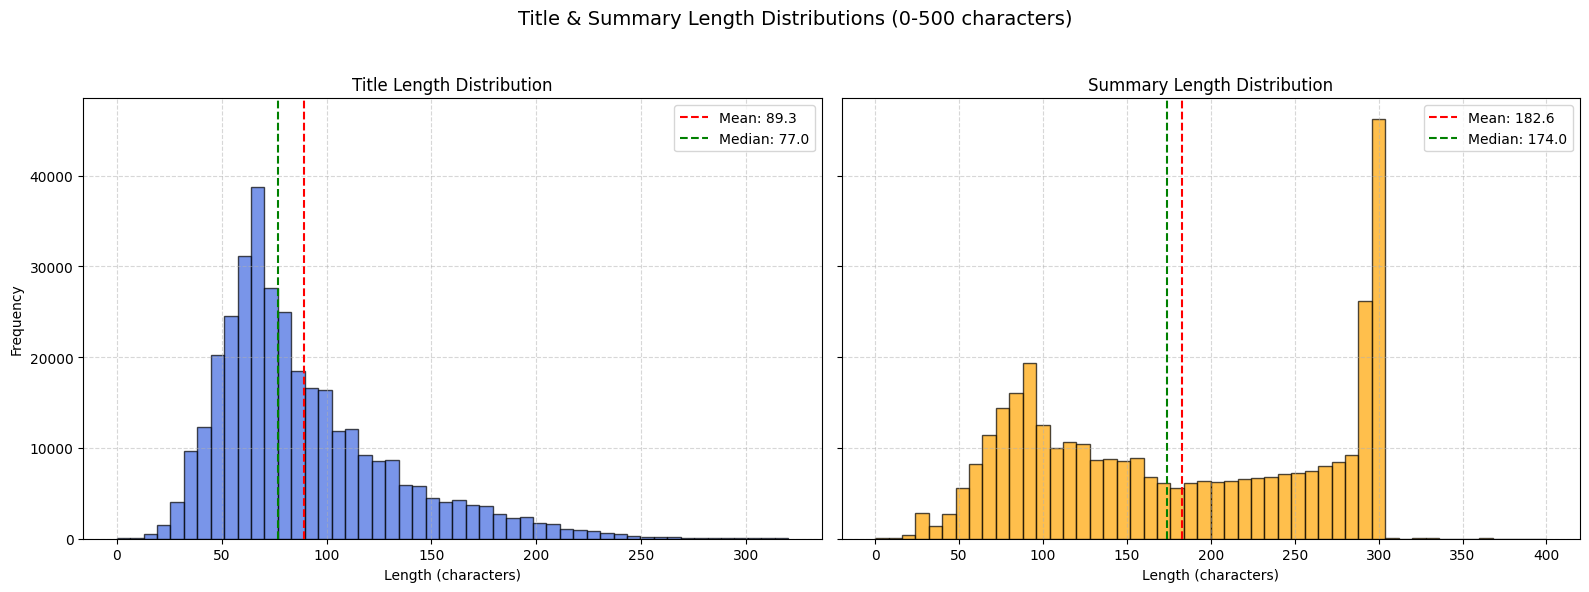

Title Length Stats:
 count    345336.00
mean         89.34
std          43.91
min           4.00
25%          60.00
50%          77.00
75%         109.00
max        1814.00
Name: title_length, dtype: float64

Summary Length Stats:
 count    345336.00
mean        182.62
std          91.17
min           1.00
25%          98.00
50%         174.00
75%         276.00
max        6535.00
Name: summary_length, dtype: float64


In [81]:
import matplotlib.pyplot as plt

# Calcular longitudes
df_news_all["title_length"] = df_news_all["title"].astype(str).apply(len)
df_news_all["summary_length"] = df_news_all["summary"].astype(str).apply(len)

# Estadísticas descriptivas
title_stats = df_news_all["title_length"].describe()
summary_stats = df_news_all["summary_length"].describe()

# Crear subplots 1 fila, 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# Plot Title Length
axes[0].hist(df_news_all["title_length"], bins=50, range=(0, 320), color='royalblue', edgecolor='black', alpha=0.7)
axes[0].axvline(title_stats['mean'], color='red', linestyle='--', label=f"Mean: {title_stats['mean']:.1f}")
axes[0].axvline(title_stats['50%'], color='green', linestyle='--', label=f"Median: {title_stats['50%']:.1f}")
axes[0].set_title("Title Length Distribution")
axes[0].set_xlabel("Length (characters)")
axes[0].set_ylabel("Frequency")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot Summary Length
axes[1].hist(df_news_all["summary_length"], bins=50, range=(0, 400), color='orange', edgecolor='black', alpha=0.7)
axes[1].axvline(summary_stats['mean'], color='red', linestyle='--', label=f"Mean: {summary_stats['mean']:.1f}")
axes[1].axvline(summary_stats['50%'], color='green', linestyle='--', label=f"Median: {summary_stats['50%']:.1f}")
axes[1].set_title("Summary Length Distribution")
axes[1].set_xlabel("Length (characters)")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Title & Summary Length Distributions (0-500 characters)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Mostrar resumen de estadísticas
print("Title Length Stats:\n", title_stats.round(2))
print("\nSummary Length Stats:\n", summary_stats.round(2))


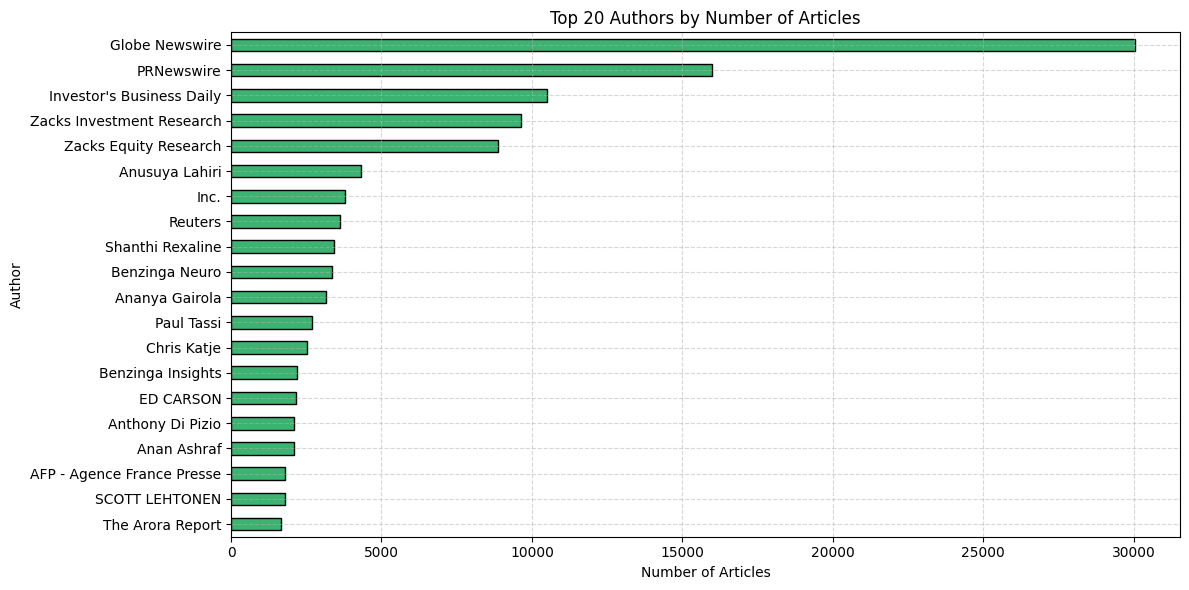

In [82]:
import ast

# Parsear authors: de string a lista y luego explotar
df_authors_exploded = df_news_all["authors"].dropna().apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else []).explode().str.strip()

# Conteo de autores más frecuentes (Top 20)
author_counts = df_authors_exploded.value_counts().head(20)

# Plot
plt.figure(figsize=(12,6))
author_counts.plot(kind='barh', color='mediumseagreen', edgecolor='black')
plt.xlabel("Number of Articles")
plt.ylabel("Author")
plt.title("Top 20 Authors by Number of Articles")
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Cantidad de noticias por category_within_source

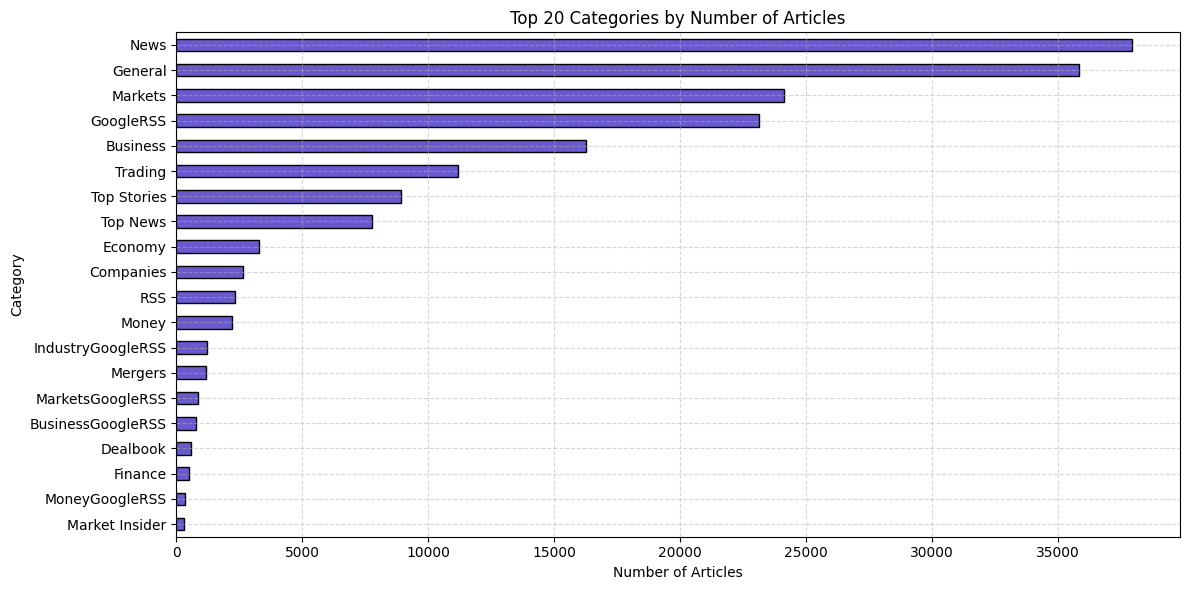

In [83]:
category_counts = df_news_all["category_within_source"].value_counts().head(20)

plt.figure(figsize=(12,6))
category_counts.plot(kind='barh', color='slateblue', edgecolor='black')
plt.xlabel("Number of Articles")
plt.ylabel("Category")
plt.title("Top 20 Categories by Number of Articles")
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


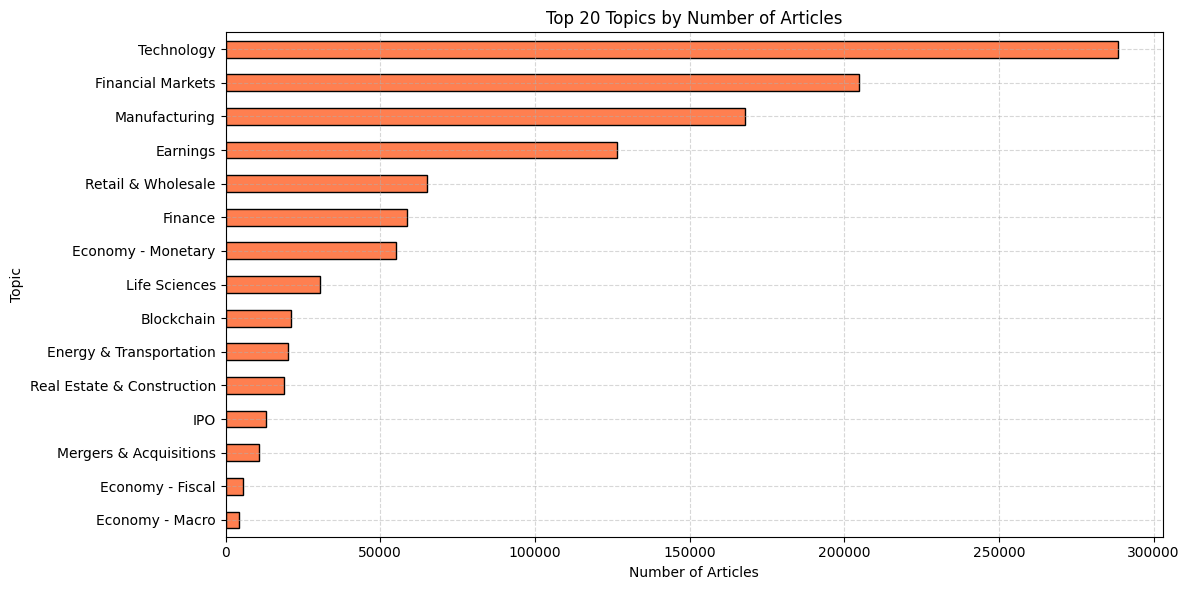

In [84]:
# Parsear topics (string a lista de dicts)
df_topics_exploded = df_news_all["topics"].dropna().apply(
    lambda x: [d['topic'] for d in ast.literal_eval(x)] if isinstance(x, str) else []
).explode().str.strip()

# Conteo de topics más frecuentes (Top 20)
topics_counts = df_topics_exploded.value_counts().head(20)

# Plot
plt.figure(figsize=(12,6))
topics_counts.plot(kind='barh', color='coral', edgecolor='black')
plt.xlabel("Number of Articles")
plt.ylabel("Topic")
plt.title("Top 20 Topics by Number of Articles")
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



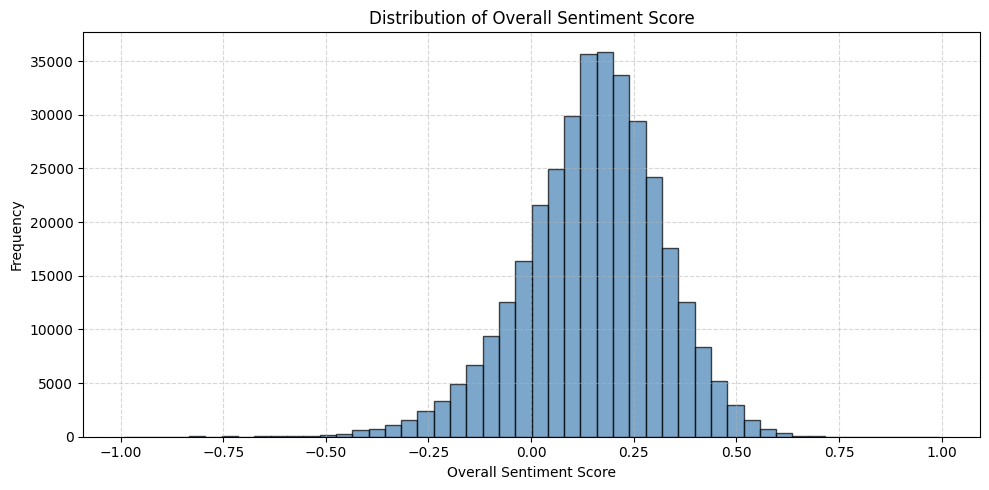

count    345336.00
mean          0.15
std           0.17
min          -0.99
25%           0.05
50%           0.16
75%           0.26
max           0.99
Name: overall_sentiment_score, dtype: float64


In [85]:
plt.figure(figsize=(10,5))
plt.hist(df_news_all["overall_sentiment_score"].astype(float).dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel("Overall Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Overall Sentiment Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Estadísticas resumen
print(df_news_all["overall_sentiment_score"].astype(float).describe().round(2))


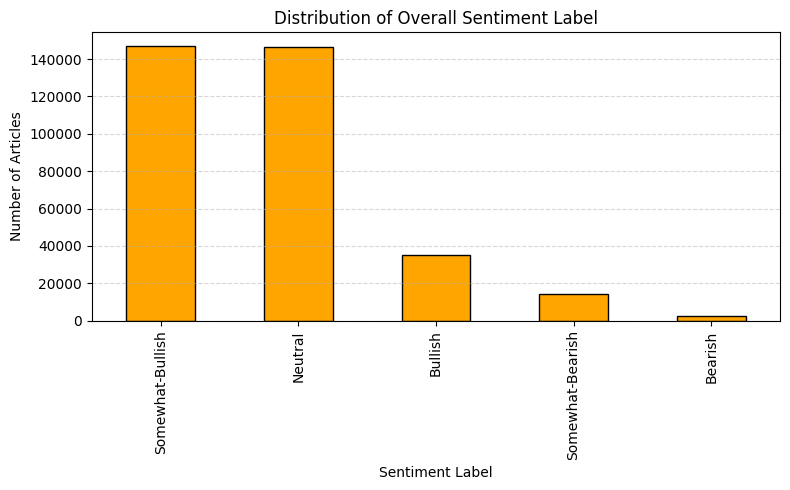

In [86]:
label_counts = df_news_all["overall_sentiment_label"].value_counts()

plt.figure(figsize=(8,5))
label_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Articles")
plt.title("Distribution of Overall Sentiment Label")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# PRICES & SENTIMENT

In [58]:
import importlib
import utils
import pandas as pd

# Recargar utils
importlib.reload(utils)

# Importar función
from utils import explode_sentiment_data

# Lista de tickers a procesar
tickers = ["AAPL", "MSFT", "NVDA", "TSLA", "META", "AMZN", "GOOG"]  # Añade aquí todos los tickers que quieras

# Inicializar DataFrames vacíos
df_all_news_full = pd.DataFrame()
df_all_news_filtered = pd.DataFrame()

# Loop para procesar cada ticker y acumular en los DataFrames directamente
for ticker in tickers:
    print(f"Procesando noticias de {ticker}...")

    # Obtener noticias
    df_news_full, df_news_filtered = explode_sentiment_data(
        ticker,
        folder="news",
        sentiment_lower=-0.2,
        sentiment_upper=0.2,
        min_relevance_score=0.5
    )

    # Añadir columna identificadora del ticker
    df_news_full["ticker"] = ticker
    df_news_filtered["ticker"] = ticker

    # Acumular en DataFrames existentes
    df_all_news_full = pd.concat([df_all_news_full, df_news_full], ignore_index=True)
    df_all_news_filtered = pd.concat([df_all_news_filtered, df_news_filtered], ignore_index=True)

# Añadir índice desde 1 al full
df_all_news_full = df_all_news_full.reset_index(drop=True)
df_all_news_full["idx"] = df_all_news_full.index + 1  # LLM espera idx desde 1

# Aplicar mismo índice al filtrado (basado en el full)
df_all_news_filtered = df_all_news_full[df_all_news_full.index.isin(df_all_news_filtered.index)].copy()

# Verificar tamaños
print(f"Total News Full: {df_all_news_full.shape}")
print(f"Total News Filtered: {df_all_news_filtered.shape}")

# Ver ejemplos
display(df_all_news_full.head(2))
display(df_all_news_filtered.head(2))


Procesando noticias de AAPL...
Procesando noticias de MSFT...
Procesando noticias de NVDA...
Procesando noticias de TSLA...
Procesando noticias de META...
Procesando noticias de AMZN...
Procesando noticias de GOOG...
Total News Full: (372411, 9)
Total News Filtered: (24968, 9)


time_published    day_date   week_date  \
0 2022-03-04 21:27:00  2022-03-04  2022-02-28   
1 2022-03-04 16:11:00  2022-03-04  2022-02-28   

                                               title  \
0  Investor Lesson: Holding Great Companies Throu...   
1  Broadcom  ( AVGO )  Q1 Earnings and Revenues S...   

                                             summary  ticker_sentiment_score  \
0  If you want to do well as an investor, you hav...                0.030323   
1  Broadcom's (AVGO) first-quarter fiscal 2022 re...               -0.002192   

   ticker_relevance_score ticker  idx  
0                0.054535   AAPL    1  
1                0.100729   AAPL    2

time_published    day_date   week_date  \
0 2022-03-04 21:27:00  2022-03-04  2022-02-28   
1 2022-03-04 16:11:00  2022-03-04  2022-02-28   

                                               title  \
0  Investor Lesson: Holding Great Companies Throu...   
1  Broadcom  ( AVGO )  Q1 Earnings and Revenues S...   

                                             summary  ticker_sentiment_score  \
0  If you want to do well as an investor, you hav...                0.030323   
1  Broadcom's (AVGO) first-quarter fiscal 2022 re...               -0.002192   

   ticker_relevance_score ticker  idx  
0                0.054535   AAPL    1  
1                0.100729   AAPL    2

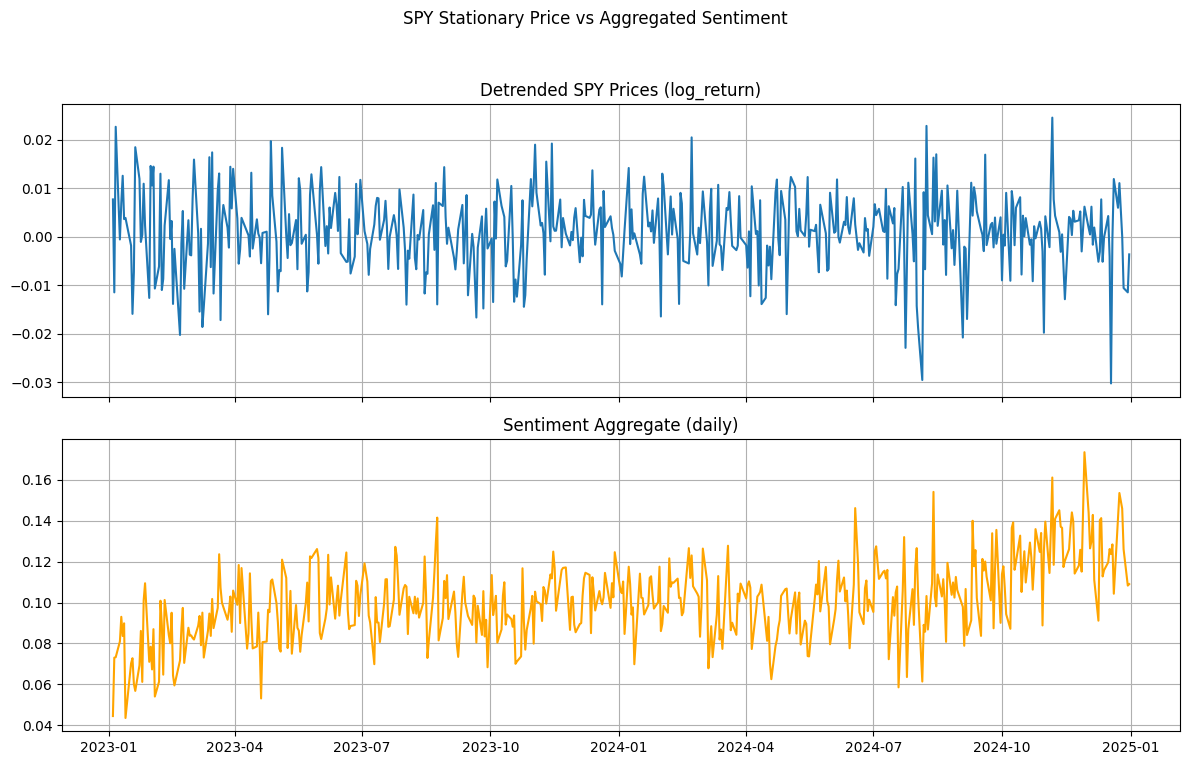

Correlation SPY: 0.1491


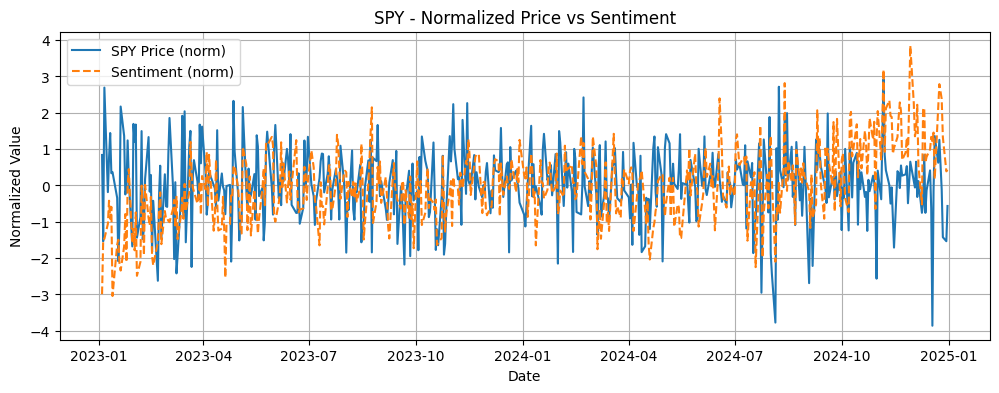

In [66]:
import importlib
import utils
import pandas as pd

# Recargar utils
importlib.reload(utils)

# Importar función
from utils import plot_stationary_with_sentiment_df

plot_stationary_with_sentiment_df(
    price_ticker="SPY",
    df_news=df_all_news_full,  # O df_all_news_full
    frequency="daily",
    detrend_method="log_return",
    sentiment_agg="daily",
    start_date="2023-01-01",
    end_date="2024-12-31",
    title="SPY Stationary Price vs Aggregated Sentiment"
)


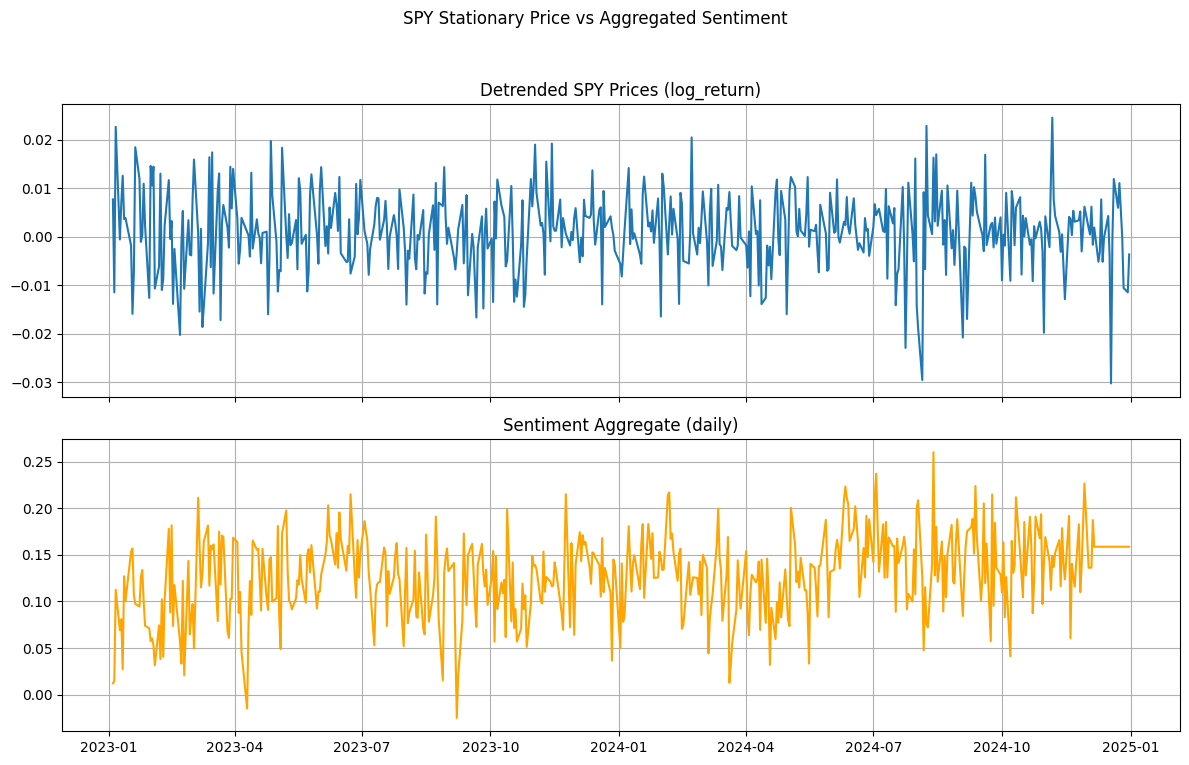

Correlation SPY: 0.0618


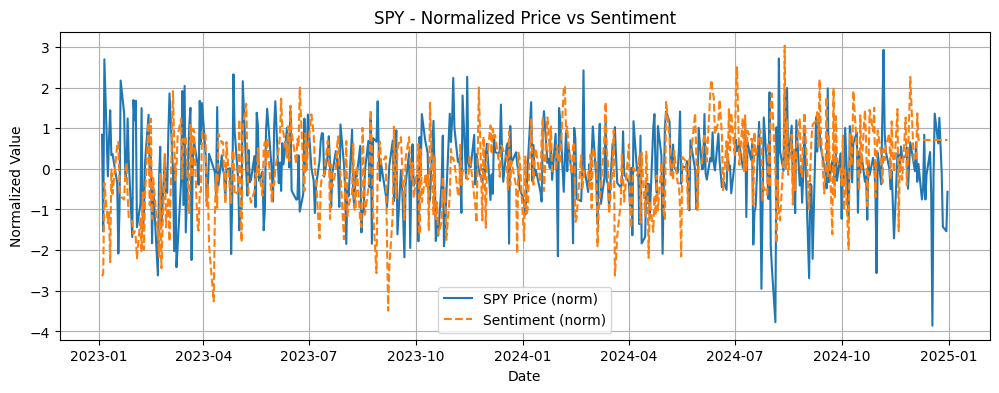

In [65]:
import importlib
import utils
import pandas as pd

# Recargar utils
importlib.reload(utils)

# Importar función
from utils import plot_stationary_with_sentiment_df

plot_stationary_with_sentiment_df(
    price_ticker="SPY",
    df_news=df_all_news_filtered,  # O df_all_news_full
    frequency="daily",
    detrend_method="log_return",
    sentiment_agg="daily",
    start_date="2023-01-01",
    end_date="2024-12-31",
    title="SPY Stationary Price vs Aggregated Sentiment"
)


Suggested ChatGPT

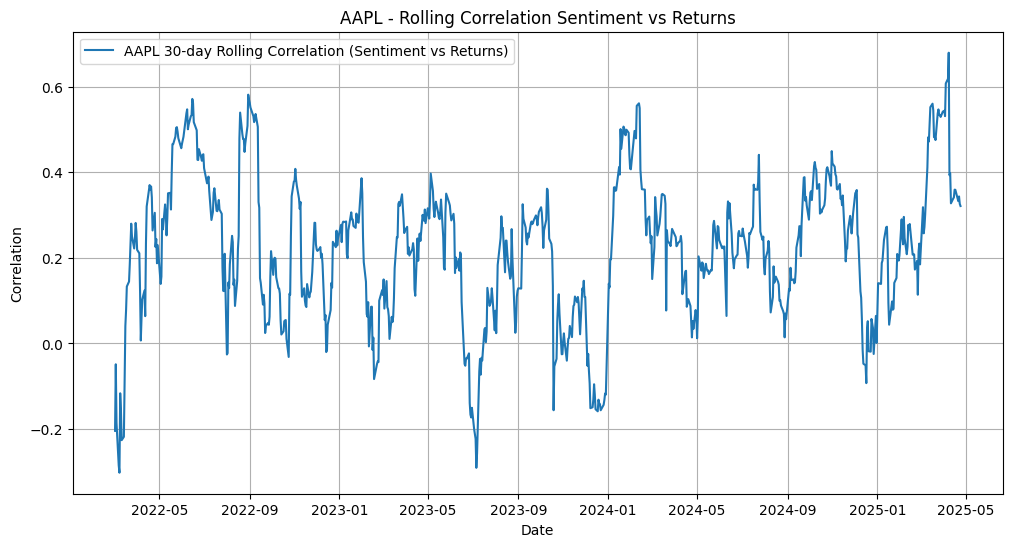

date
1999-11-01         NaN
1999-11-02         NaN
1999-11-03         NaN
1999-11-04         NaN
1999-11-05         NaN
                ...   
2025-04-17    0.358714
2025-04-21    0.332291
2025-04-22    0.343244
2025-04-23    0.325903
2025-04-24    0.320920
Length: 6409, dtype: float64

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

def master_thesis_analysis(ticker: str, base_path: str):
    # Load prices
    price_path = f"{base_path}/stocks/{ticker}/prices/{ticker}_daily_adjusted.csv"
    prices_df = pd.read_csv(price_path)
    prices_df['date'] = pd.to_datetime(prices_df['date'])
    prices_df = prices_df.set_index('date').sort_index()

    # Auto-detect adjusted close column
    price_col = next((col for col in prices_df.columns if 'adjusted' in col.lower()), None)
    if not price_col:
        price_col = next((col for col in prices_df.columns if 'close' in col.lower()), None)
    if not price_col:
        raise ValueError("No price column found (adjusted_close or close) in CSV")

    prices_df.rename(columns={price_col: 'price'}, inplace=True)

    # Load news sentiment
    news_path = f"{base_path}/news/{ticker}_news_2022-01-01_to_2025-05-01.csv"
    news_df = pd.read_csv(news_path, sep=';')
    news_df['time_published'] = pd.to_datetime(news_df['time_published'])

    # Explode ticker_sentiment JSON
    rows = []
    for _, r in news_df.iterrows():
        try:
            sentiments = json.loads(r['ticker_sentiment'].replace("'", '"'))
        except:
            continue
        for sent in sentiments:
            if sent.get('ticker') == ticker:
                tss = float(sent.get('ticker_sentiment_score', 0))
                trs = float(sent.get('relevance_score', 0))
                rows.append({
                    'time_published': r['time_published'],
                    'day_date': r['time_published'].date(),
                    'ticker_sentiment_score': tss,
                    'ticker_relevance_score': trs
                })

    sentiment_df = pd.DataFrame(rows)
    sentiment_df = sentiment_df.groupby('day_date')['ticker_sentiment_score'].mean()
    sentiment_df.index = pd.to_datetime(sentiment_df.index)  # <- This line fixes your resample error


    # Compute log returns
    log_returns = np.log(prices_df['price'] / prices_df['price'].shift(1))

    # Rolling Correlation Sentiment vs Returns
    sentiment_aligned = sentiment_df.reindex(log_returns.index.date, method='nearest')
    rolling_corr = log_returns.rolling(30).corr(sentiment_aligned)

    # Plot Rolling Correlation
    plt.figure(figsize=(12, 6))
    plt.plot(rolling_corr, label=f'{ticker} 30-day Rolling Correlation (Sentiment vs Returns)')
    plt.title(f'{ticker} - Rolling Correlation Sentiment vs Returns')
    plt.xlabel('Date')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Volume vs Sentiment Overlay (optional)
    if 'volume' in prices_df.columns:
        volume_spikes = prices_df['volume'] > prices_df['volume'].quantile(0.9)
        plt.figure(figsize=(14, 6))
        plt.plot(prices_df.index, prices_df['volume'], label='Volume')
        plt.scatter(prices_df.index[volume_spikes], prices_df['volume'][volume_spikes], color='red', label='Volume Spike', alpha=0.6)
        plt.twinx()
        plt.plot(sentiment_df.index, sentiment_df.values, color='orange', alpha=0.5, label='Sentiment')
        plt.title(f'{ticker} - Volume Spikes vs Sentiment Overlay')
        plt.legend()
        plt.show()

    return rolling_corr

# Example call:
master_thesis_analysis('AAPL', 'C:/Users/Victor/Downloads/MSc DataScience/MasterThesis - GitHub/data/extract')


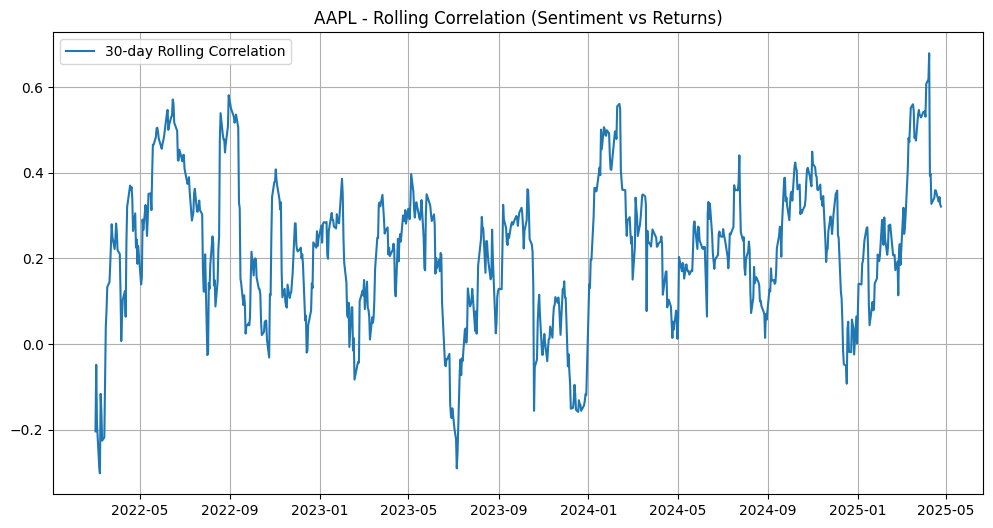

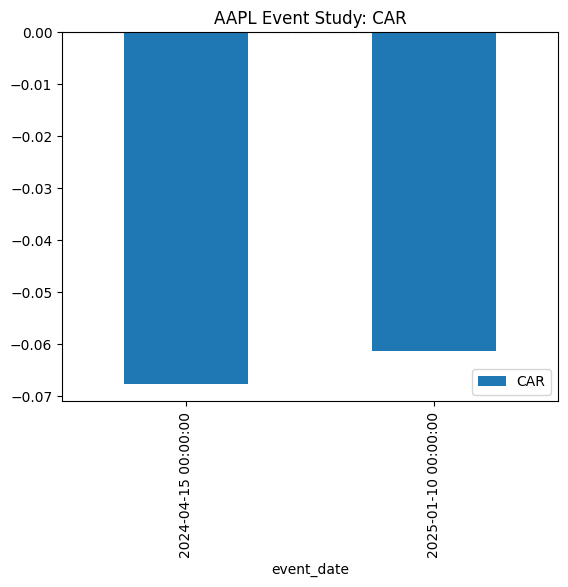

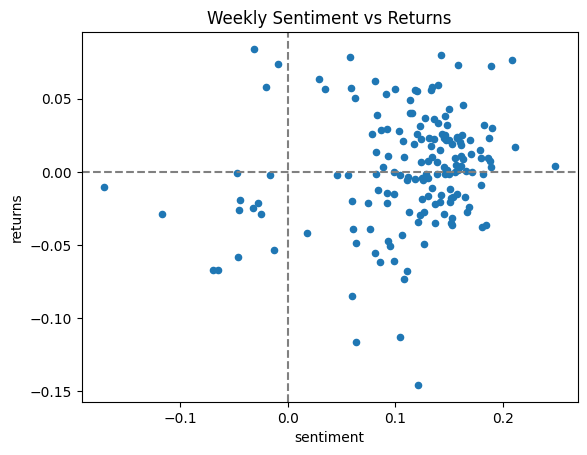

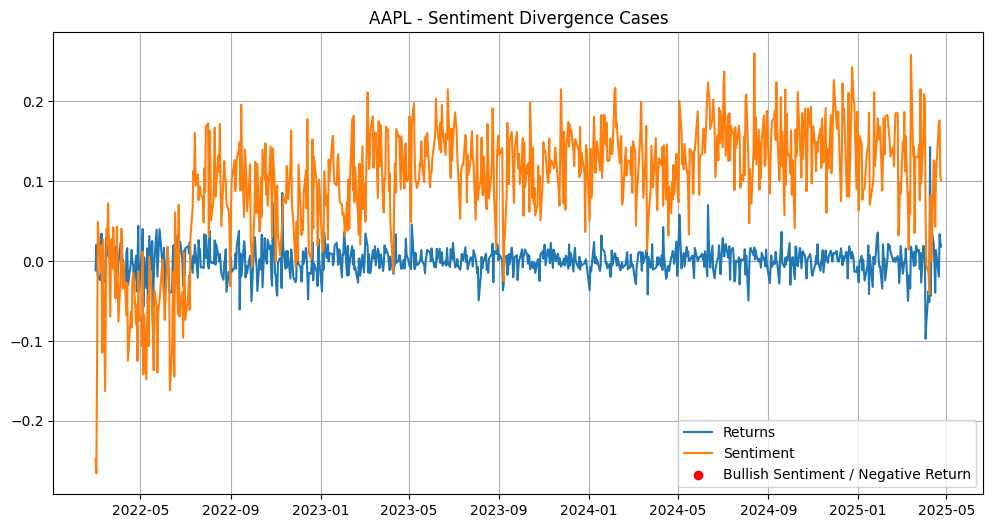

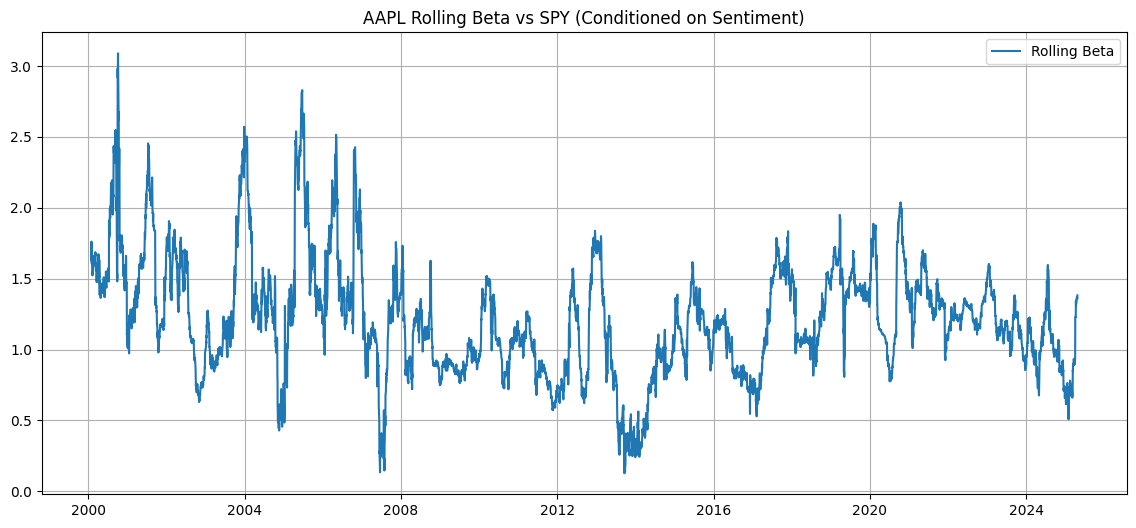

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

def master_thesis_analysis_full(ticker: str, base_path: str, spy_path: str, event_dates=None):
    # Load Prices
    price_path = f"{base_path}/stocks/{ticker}/prices/{ticker}_daily_adjusted.csv"
    prices_df = pd.read_csv(price_path)
    prices_df['date'] = pd.to_datetime(prices_df['date'])
    prices_df = prices_df.set_index('date').sort_index()

    price_col = next((col for col in prices_df.columns if 'adjusted' in col.lower()), None)
    if not price_col:
        price_col = next((col for col in prices_df.columns if 'close' in col.lower()), None)
    if not price_col:
        raise ValueError("No price column found (adjusted_close or close)")
    prices_df.rename(columns={price_col: 'price'}, inplace=True)

    # Load News
    news_path = f"{base_path}/news/{ticker}_news_2022-01-01_to_2025-05-01.csv"
    news_df = pd.read_csv(news_path, sep=';')
    news_df['time_published'] = pd.to_datetime(news_df['time_published'])

    rows = []
    for _, r in news_df.iterrows():
        try:
            sentiments = json.loads(r['ticker_sentiment'].replace("'", '"'))
        except:
            continue
        for sent in sentiments:
            if sent.get('ticker') == ticker:
                tss = float(sent.get('ticker_sentiment_score', 0))
                trs = float(sent.get('relevance_score', 0))
                rows.append({
                    'time_published': r['time_published'],
                    'day_date': r['time_published'].date(),
                    'ticker_sentiment_score': tss,
                    'ticker_relevance_score': trs
                })
    sentiment_df = pd.DataFrame(rows)
    sentiment_df = sentiment_df.groupby('day_date')['ticker_sentiment_score'].mean()
    sentiment_df.index = pd.to_datetime(sentiment_df.index)  # <- This line fixes your resample error

    # --- Plots ---
    # Rolling Correlation
    log_returns = np.log(prices_df['price'] / prices_df['price'].shift(1))
    sentiment_aligned = sentiment_df.reindex(log_returns.index.date, method='nearest')
    rolling_corr = log_returns.rolling(30).corr(sentiment_aligned)

    plt.figure(figsize=(12,6))
    plt.plot(rolling_corr, label='30-day Rolling Correlation')
    plt.title(f'{ticker} - Rolling Correlation (Sentiment vs Returns)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Volume vs Sentiment Overlay
    if 'volume' in prices_df.columns:
        volume_spikes = prices_df['volume'] > prices_df['volume'].quantile(0.9)
        plt.figure(figsize=(14,6))
        plt.plot(prices_df.index, prices_df['volume'], label='Volume')
        plt.scatter(prices_df.index[volume_spikes], prices_df['volume'][volume_spikes], color='red', alpha=0.5, label='Volume Spikes')
        plt.twinx()
        plt.plot(sentiment_df.index, sentiment_df.values, color='orange', label='Sentiment', alpha=0.5)
        plt.title(f'{ticker} - Volume Spikes vs Sentiment')
        plt.legend()
        plt.show()

    # Event Study CAR
    if event_dates:
        log_returns = np.log(prices_df['price'] / prices_df['price'].shift(1))
        car_list = []
        for event_date in pd.to_datetime(event_dates):
            if event_date not in prices_df.index:
                continue
            idx = prices_df.index.get_loc(event_date)
            window_dates = prices_df.index[idx:idx + 5]
            car = log_returns.loc[window_dates].cumsum()
            if not car.empty:
                car_list.append((event_date, car.values[-1]))
        car_df = pd.DataFrame(car_list, columns=['event_date', 'CAR'])
        car_df.plot.bar(x='event_date', y='CAR', title=f'{ticker} Event Study: CAR')
        plt.axhline(0, linestyle='--', color='gray')
        plt.show()

    # Weekly Sentiment vs Returns
    returns = np.log(prices_df['price'] / prices_df['price'].shift(1))
    returns_weekly = returns.resample('W').sum()
    sentiment_weekly = sentiment_df.resample('W').mean()
    merged = pd.concat([returns_weekly, sentiment_weekly], axis=1).dropna()
    merged.columns = ['returns', 'sentiment']
    merged.plot.scatter(x='sentiment', y='returns', title='Weekly Sentiment vs Returns')
    plt.axhline(0, linestyle='--', color='gray')
    plt.axvline(0, linestyle='--', color='gray')
    plt.show()

    # Sentiment Divergence
    merged_daily = pd.concat([returns, sentiment_df], axis=1).dropna()
    merged_daily.columns = ['returns', 'sentiment']
    divergence = merged_daily[(merged_daily['sentiment'] > 0.3) & (merged_daily['returns'] < 0)]
    plt.figure(figsize=(12,6))
    plt.plot(merged_daily.index, merged_daily['returns'], label='Returns')
    plt.plot(merged_daily.index, merged_daily['sentiment'], label='Sentiment')
    plt.scatter(divergence.index, divergence['returns'], color='red', label='Bullish Sentiment / Negative Return')
    plt.title(f'{ticker} - Sentiment Divergence Cases')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Rolling Beta vs SPY
    spy_df = pd.read_csv(spy_path)
    spy_df['date'] = pd.to_datetime(spy_df['date'])
    spy_df = spy_df.set_index('date').sort_index()
    spy_col = next((col for col in spy_df.columns if 'adjusted' in col.lower()), None)
    if not spy_col:
        spy_col = next((col for col in spy_df.columns if 'close' in col.lower()), None)
    spy_df.rename(columns={spy_col: 'price'}, inplace=True)

    stock_ret = np.log(prices_df['price'] / prices_df['price'].shift(1))
    spy_ret = np.log(spy_df['price'] / spy_df['price'].shift(1))
    beta_series = []
    for i in range(60, len(stock_ret)):
        cov = stock_ret.iloc[i-60:i].cov(spy_ret.iloc[i-60:i])
        var_spy = spy_ret.iloc[i-60:i].var()
        beta = cov / var_spy if var_spy != 0 else np.nan
        beta_series.append(beta)
    beta_series = pd.Series(beta_series, index=stock_ret.index[60:])
    sentiment_df.index = pd.to_datetime(sentiment_df.index)
    sentiment_series = sentiment_df.reindex(beta_series.index.date, method='nearest')

    plt.figure(figsize=(14,6))
    plt.plot(beta_series, label='Rolling Beta')

    plt.title(f'{ticker} Rolling Beta vs SPY (Conditioned on Sentiment)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example call:
master_thesis_analysis_full(
    'AAPL',
    'C:/Users/Victor/Downloads/MSc DataScience/MasterThesis - GitHub/data/extract',
    'C:/Users/Victor/Downloads/MSc DataScience/MasterThesis - GitHub/data/extract/stocks/SPY/prices/SPY_daily_adjusted.csv',
    event_dates=['2024-04-15', '2025-01-10']
)


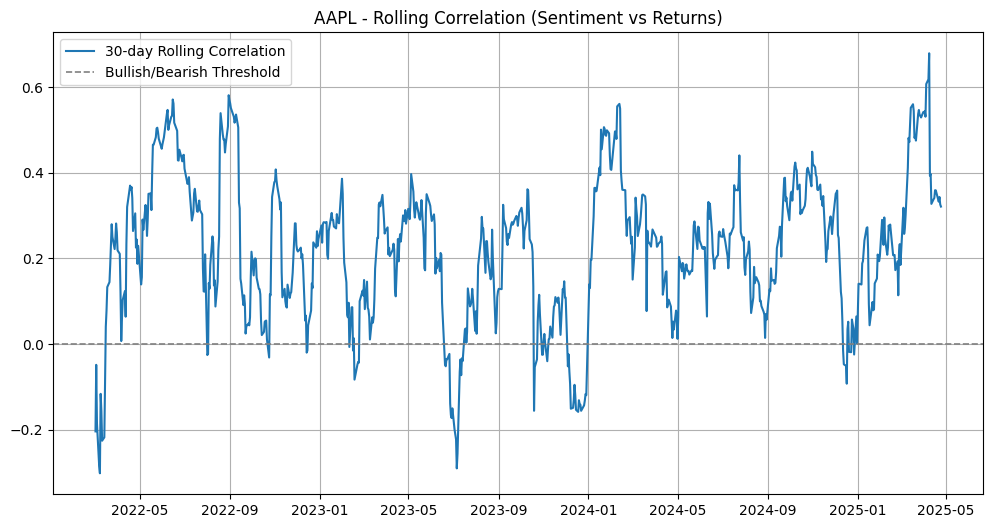

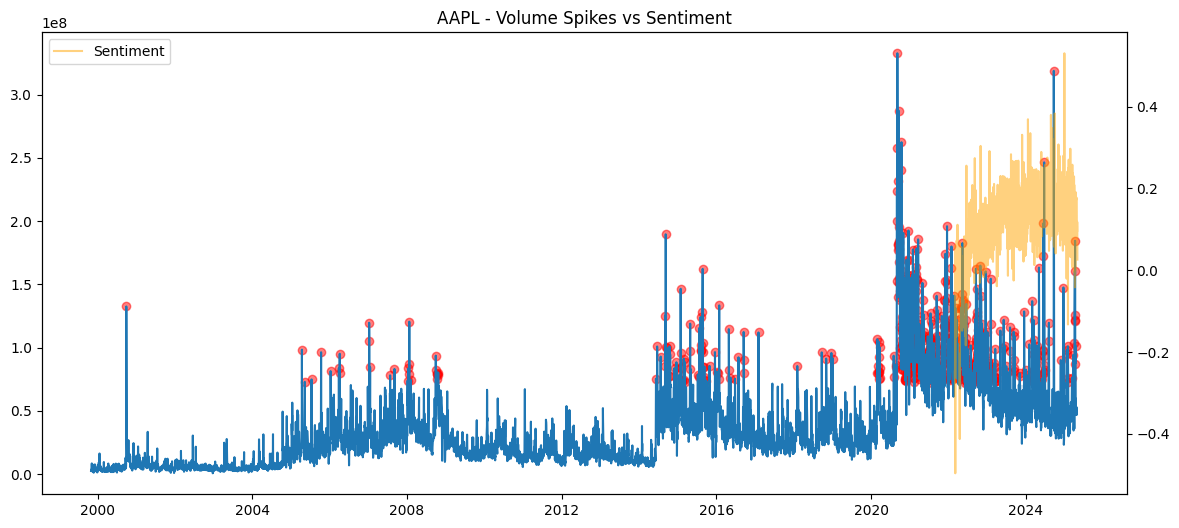

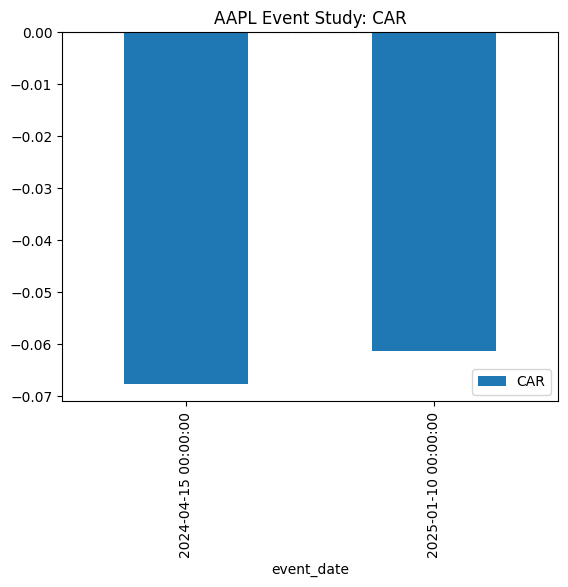

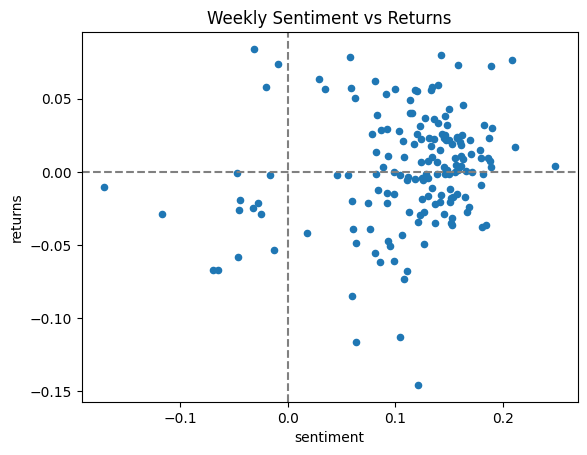

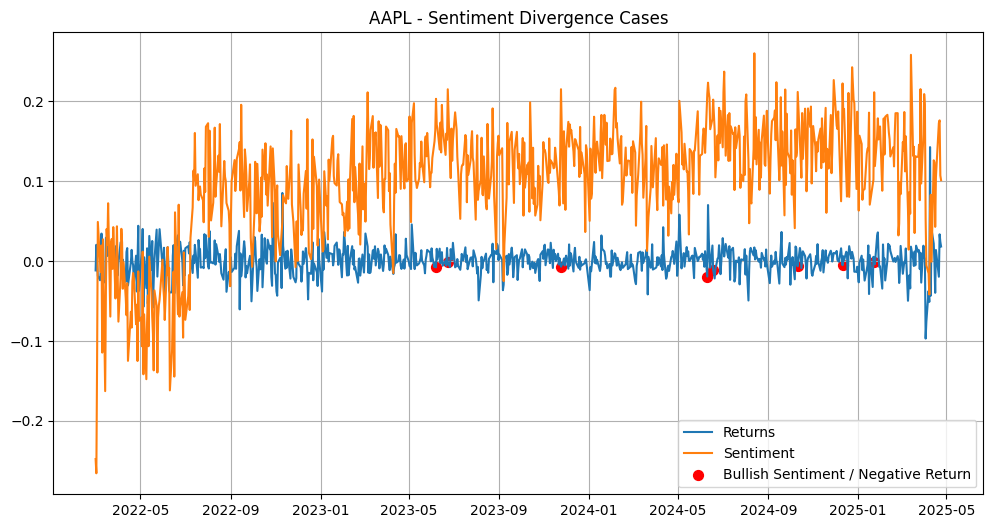

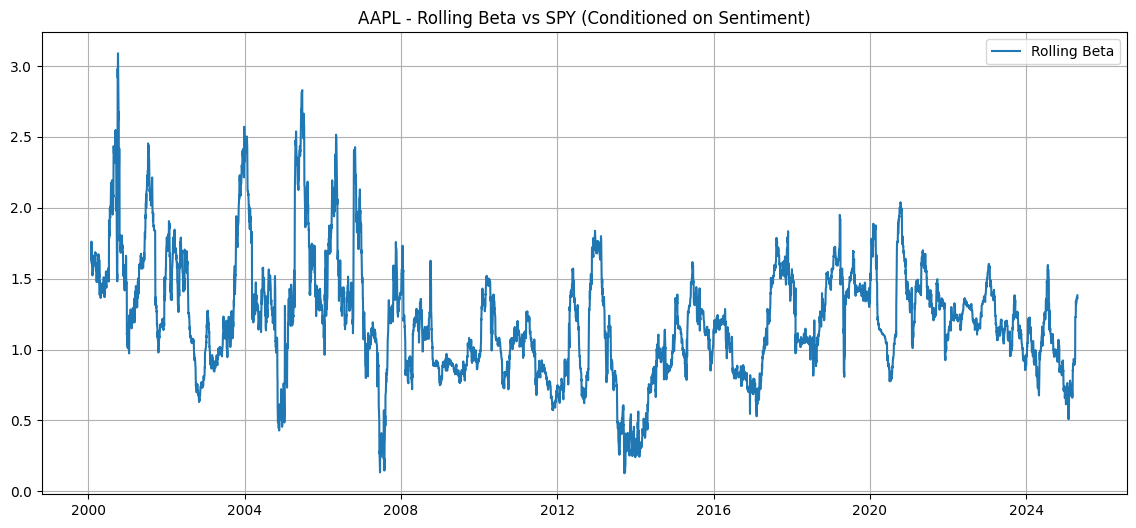

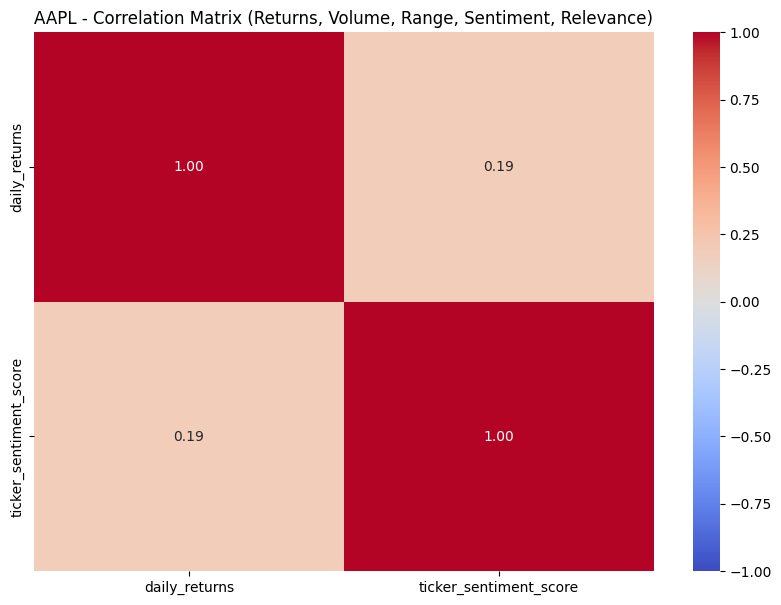

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

def master_thesis_analysis_full(ticker: str, base_path: str, spy_path: str, event_dates=None):
    # Load prices with correct column mapping
    price_path = f"{base_path}/stocks/{ticker}/prices/{ticker}_daily_adjusted.csv"
    prices_df = pd.read_csv(price_path)
    prices_df['date'] = pd.to_datetime(prices_df['date'])
    prices_df = prices_df.set_index('date').sort_index()

    # Rename columns based on your CSV structure
    col_mapping = {
        '5. adjusted close': 'price',
        '6. volume': 'volume',
        '2. high': 'high',
        '3. low': 'low'
    }
    prices_df.rename(columns=col_mapping, inplace=True)

    # Now safe to calculate returns, volume change, hl_range:
    daily_returns = np.log(prices_df['price'] / prices_df['price'].shift(1))
    volume_change = prices_df['volume'].pct_change()
    hl_range = (prices_df['high'] - prices_df['low']) / prices_df['price']


    # Load News
    news_path = f"{base_path}/news/{ticker}_news_2022-01-01_to_2025-05-01.csv"
    news_df = pd.read_csv(news_path, sep=';')
    news_df['time_published'] = pd.to_datetime(news_df['time_published'])

    # Explode ticker_sentiment JSON
    rows = []
    for _, r in news_df.iterrows():
        try:
            sentiments = json.loads(r['ticker_sentiment'].replace("'", '"'))
        except:
            continue
        for sent in sentiments:
            if sent.get('ticker') == ticker:
                tss = float(sent.get('ticker_sentiment_score', 0))
                trs = float(sent.get('relevance_score', 0))
                rows.append({
                    'time_published': r['time_published'],
                    'day_date': r['time_published'].date(),
                    'ticker_sentiment_score': tss,
                    'ticker_relevance_score': trs
                })
    sentiment_df = pd.DataFrame(rows)
    sentiment_df = sentiment_df.groupby('day_date')['ticker_sentiment_score'].mean()
    sentiment_df.index = pd.to_datetime(sentiment_df.index)

    # Rolling Correlation (Sentiment vs Returns)
    log_returns = np.log(prices_df['price'] / prices_df['price'].shift(1))
    sentiment_aligned = sentiment_df.reindex(log_returns.index.date, method='nearest')
    rolling_corr = log_returns.rolling(30).corr(sentiment_aligned)

    plt.figure(figsize=(12,6))
    plt.plot(rolling_corr, label='30-day Rolling Correlation')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1.2, label='Bullish/Bearish Threshold')
    plt.title(f'{ticker} - Rolling Correlation (Sentiment vs Returns)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Volume vs Sentiment Overlay
    if 'volume' in prices_df.columns:
        volume_spikes = prices_df['volume'] > prices_df['volume'].quantile(0.9)
        plt.figure(figsize=(14,6))
        plt.plot(prices_df.index, prices_df['volume'], label='Volume')
        plt.scatter(prices_df.index[volume_spikes], prices_df['volume'][volume_spikes], color='red', alpha=0.5, label='Volume Spikes')
        plt.twinx()
        plt.plot(sentiment_df.index, sentiment_df.values, color='orange', label='Sentiment', alpha=0.5)
        plt.title(f'{ticker} - Volume Spikes vs Sentiment')
        plt.legend()
        plt.show()

    # Event Study CAR
    if event_dates:
        car_list = []
        for event_date in pd.to_datetime(event_dates):
            if event_date not in prices_df.index:
                continue
            idx = prices_df.index.get_loc(event_date)
            window_dates = prices_df.index[idx:idx + 5]
            car = log_returns.loc[window_dates].cumsum()
            if not car.empty:
                car_list.append((event_date, car.values[-1]))
        car_df = pd.DataFrame(car_list, columns=['event_date', 'CAR'])
        car_df.plot.bar(x='event_date', y='CAR', title=f'{ticker} Event Study: CAR')
        plt.axhline(0, linestyle='--', color='gray')
        plt.show()

    # Weekly Sentiment vs Returns
    returns_weekly = log_returns.resample('W').sum()
    sentiment_weekly = sentiment_df.resample('W').mean()
    merged = pd.concat([returns_weekly, sentiment_weekly], axis=1).dropna()
    merged.columns = ['returns', 'sentiment']
    merged.plot.scatter(x='sentiment', y='returns', title='Weekly Sentiment vs Returns')
    plt.axhline(0, linestyle='--', color='gray')
    plt.axvline(0, linestyle='--', color='gray')
    plt.show()

    # Sentiment Divergence Cases
    merged_daily = pd.concat([log_returns, sentiment_df], axis=1).dropna()
    merged_daily.columns = ['returns', 'sentiment']
    divergence = merged_daily[(merged_daily['sentiment'] > 0.2) & (merged_daily['returns'] < 0)]
    plt.figure(figsize=(12,6))
    plt.plot(merged_daily.index, merged_daily['returns'], label='Returns')
    plt.plot(merged_daily.index, merged_daily['sentiment'], label='Sentiment')
    plt.scatter(divergence.index, divergence['returns'], color='red', s=50, label='Bullish Sentiment / Negative Return')
    plt.title(f'{ticker} - Sentiment Divergence Cases')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Load SPY
    spy_df = pd.read_csv(spy_path)
    spy_df['date'] = pd.to_datetime(spy_df['date'])
    spy_df = spy_df.set_index('date').sort_index()

    # Limit SPY to AAPL's date range
    spy_df = spy_df.loc[prices_df.index.min():prices_df.index.max()]

    # Detect adjusted_close or close
    spy_col = next((col for col in spy_df.columns if 'adjusted' in col.lower()), None)
    if not spy_col:
        spy_col = next((col for col in spy_df.columns if 'close' in col.lower()), None)
    spy_df.rename(columns={spy_col: 'price'}, inplace=True)

    # Compute returns
    spy_ret = np.log(spy_df['price'] / spy_df['price'].shift(1))
    aapl_ret = np.log(prices_df['price'] / prices_df['price'].shift(1))

    # Align both returns to common dates (intersection)
    common_index = spy_ret.index.intersection(aapl_ret.index)
    spy_ret = spy_ret.loc[common_index]
    aapl_ret = aapl_ret.loc[common_index]

    # Rolling Beta Calculation
    beta_series = []
    for i in range(60, len(aapl_ret)):
        cov = aapl_ret.iloc[i-60:i].cov(spy_ret.iloc[i-60:i])
        var_spy = spy_ret.iloc[i-60:i].var()
        beta = cov / var_spy if var_spy != 0 else np.nan
        beta_series.append(beta)
    beta_series = pd.Series(beta_series, index=aapl_ret.index[60:])

    # Align sentiment series
    sentiment_series = sentiment_df.reindex(beta_series.index.date, method='nearest')

    # Plot
    plt.figure(figsize=(14,6))
    plt.plot(beta_series, label='Rolling Beta')
    # plt.scatter(beta_series.index[sentiment_series > 0.2], beta_series[sentiment_series > 0.2],
    #             color='green', alpha=0.6, s=50, label='Bullish Sentiment')
    # plt.scatter(beta_series.index[sentiment_series < -0.2], beta_series[sentiment_series < -0.2],
    #             color='red', alpha=0.6, s=50, label='Bearish Sentiment')
    plt.title(f'{ticker} - Rolling Beta vs SPY (Conditioned on Sentiment)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Prepare sentiment & relevance
    sentiment_df_full = pd.DataFrame(rows)
    sentiment_df_full['day_date'] = pd.to_datetime(sentiment_df_full['day_date'])

    sentiment_grouped = sentiment_df_full.groupby('day_date').agg({
          'ticker_sentiment_score': 'mean' # ,
        # 'ticker_relevance_score': 'mean'
    })

    # Merge and Correlation Matrix
    df_corr = pd.concat([
        daily_returns.rename('daily_returns'),
        # volume_change.rename('volume_change'),
        # hl_range.rename('hl_range'),
        sentiment_grouped
    ], axis=1).dropna()

    # Correlation matrix plot
    import seaborn as sns
    plt.figure(figsize=(10,7))
    sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title(f'{ticker} - Correlation Matrix (Returns, Volume, Range, Sentiment, Relevance)')
    plt.show()
    

master_thesis_analysis_full(
'AAPL',
'C:/Users/Victor/Downloads/MSc DataScience/MasterThesis - GitHub/data/extract',
'C:/Users/Victor/Downloads/MSc DataScience/MasterThesis - GitHub/data/extract/stocks/SPY/prices/SPY_daily_adjusted.csv',
event_dates=['2024-04-15', '2025-01-10']
)


c:\Users\Victor\Downloads\MSc DataScience\MasterThesis - GitHub\venvMasterThesis\Lib\site-packages\matplotlib\patches.py:797: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
c:\Users\Victor\Downloads\MSc DataScience\MasterThesis - GitHub\venvMasterThesis\Lib\site-packages\matplotlib\transforms.py:2036: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


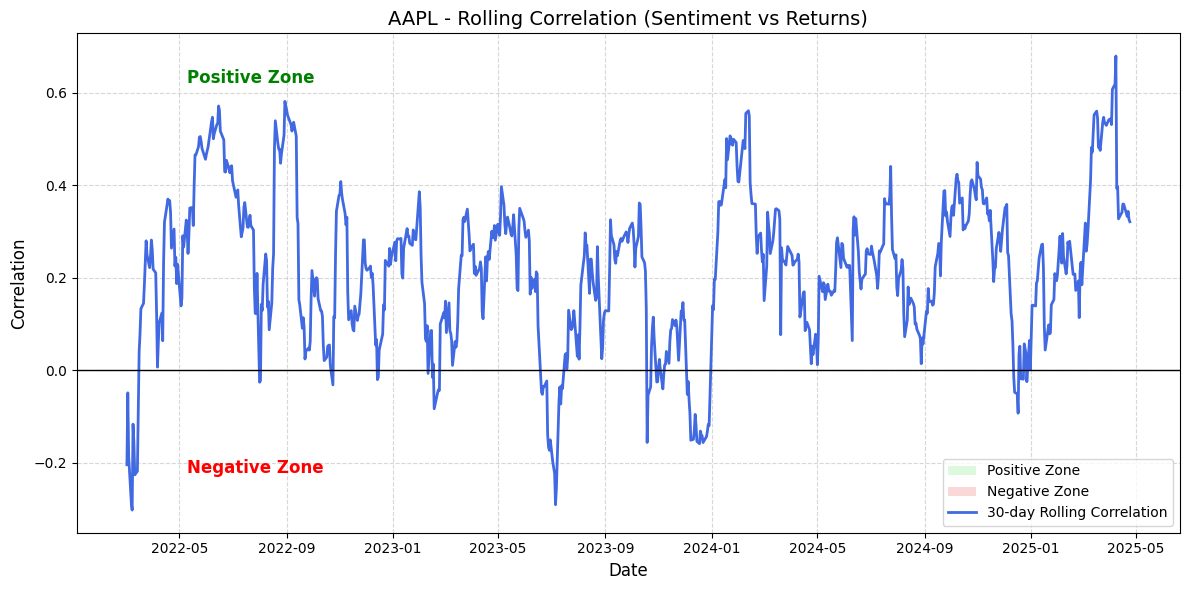

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

def master_thesis_analysis_full(ticker: str, base_path: str, spy_path: str, event_dates=None):
    # --- Load Prices ---
    price_path = f"{base_path}/stocks/{ticker}/prices/{ticker}_daily_adjusted.csv"
    prices_df = pd.read_csv(price_path)
    prices_df['date'] = pd.to_datetime(prices_df['date'])
    prices_df = prices_df.set_index('date').sort_index()

    # Rename columns
    col_mapping = {
        '5. adjusted close': 'price',
        '6. volume': 'volume',
        '2. high': 'high',
        '3. low': 'low'
    }
    prices_df.rename(columns=col_mapping, inplace=True)

    # --- Load Sentiment ---
    news_path = f"{base_path}/news/{ticker}_news_2022-01-01_to_2025-05-01.csv"
    news_df = pd.read_csv(news_path, sep=';')
    news_df['time_published'] = pd.to_datetime(news_df['time_published'])

    rows = []
    for _, r in news_df.iterrows():
        try:
            sentiments = json.loads(r['ticker_sentiment'].replace("'", '"'))
        except:
            continue
        for sent in sentiments:
            if sent.get('ticker') == ticker:
                tss = float(sent.get('ticker_sentiment_score', 0))
                trs = float(sent.get('relevance_score', 0))
                rows.append({
                    'time_published': r['time_published'],
                    'day_date': r['time_published'].date(),
                    'ticker_sentiment_score': tss,
                    'ticker_relevance_score': trs
                })
    sentiment_df = pd.DataFrame(rows)
    sentiment_df = sentiment_df.groupby('day_date').agg({
        'ticker_sentiment_score': 'mean',
        'ticker_relevance_score': 'mean'
    })
    sentiment_df.index = pd.to_datetime(sentiment_df.index)

    # --- Rolling Correlation ---
    daily_returns = np.log(prices_df['price'] / prices_df['price'].shift(1))
    sentiment_aligned = sentiment_df['ticker_sentiment_score'].reindex(daily_returns.index.date, method='nearest')
    rolling_corr = daily_returns.rolling(30).corr(sentiment_aligned)

    plt.figure(figsize=(12,6))

    # Positive zone background (above 0)
    plt.axhspan(0, rolling_corr.max(), facecolor='lightgreen', alpha=0.3, label='Positive Zone')

    # Negative zone background (below 0)
    plt.axhspan(rolling_corr.min(), 0, facecolor='lightcoral', alpha=0.3, label='Negative Zone')

    # Plot rolling correlation line
    plt.plot(rolling_corr, color='royalblue', linewidth=2, label='30-day Rolling Correlation')

    # Threshold line at 0
    plt.axhline(0, color='black', linestyle='-', linewidth=1)

    # Zone labels
    ax = plt.gca()
    ax.text(0.1, 0.9, 'Positive Zone', color='green', fontsize=12, weight='bold', transform=ax.transAxes)
    ax.text(0.1, 0.12, 'Negative Zone', color='red', fontsize=12, weight='bold', transform=ax.transAxes)

    # Styling
    plt.title(f'{ticker} - Rolling Correlation (Sentiment vs Returns)', fontsize=14)
    plt.ylabel('Correlation', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    
# Example call
master_thesis_analysis_full(
    'AAPL',
    'C:/Users/Victor/Downloads/MSc DataScience/MasterThesis - GitHub/data/extract',
    'C:/Users/Victor/Downloads/MSc DataScience/MasterThesis - GitHub/data/extract/stocks/SPY/prices/SPY_daily_adjusted.csv',
    event_dates=['2024-04-15', '2025-01-10']
)


In [145]:
import pandas as pd
import numpy as np

# Tickers de las 7 Magníficas
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META', 'NVDA', 'TSLA']

# Base path (ajusta según tu estructura)
base_path = 'C:/Users/Victor/Downloads/MSc DataScience/MasterThesis - GitHub/data/extract'

# Función para calcular volatilidad diaria
def compute_volatility(ticker):
    file_path = f"{base_path}/stocks/{ticker}/prices/{ticker}_daily_adjusted.csv"
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()
    price_col = next((col for col in df.columns if 'adjusted' in col.lower()), None)
    if not price_col:
        price_col = next((col for col in df.columns if 'close' in col.lower()), None)
    df['price'] = df[price_col]
    log_returns = np.log(df['price'] / df['price'].shift(1)).dropna()
    volatility = log_returns.std()  # Volatilidad diaria
    return volatility

# Calcular volatilidades para todos los tickers
vol_data = []
for ticker in tickers:
    vol = compute_volatility(ticker)
    vol_data.append({'Ticker': ticker, 'Daily Volatility': vol, 'Annualized Volatility': vol * np.sqrt(252)})

# Crear tabla de resultados
vol_df = pd.DataFrame(vol_data)

# Mostrar tabla
print(vol_df.round(4))


  Ticker  Daily Volatility  Annualized Volatility
0   AAPL            0.0254                 0.4032
1   MSFT            0.0191                 0.3028
2   AMZN            0.0310                 0.4916
3   GOOG            0.0193                 0.3056
4   META            0.0253                 0.4009
5   NVDA            0.0375                 0.5959
6   TSLA            0.0364                 0.5777


Mean Return: 0.0009
Variance: 0.000645
Kurtosis: 111.17
Skewness: -3.85
Spike Up Events: 139
Spike Down Events: 139


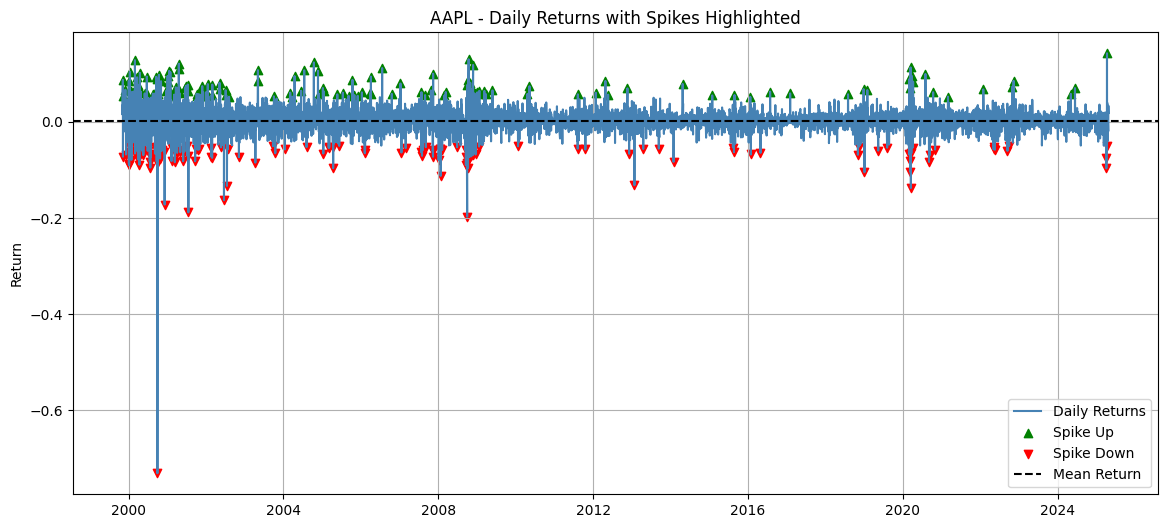

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Load AAPL prices (adjust your path)
prices_df = pd.read_csv('C:/Users/Victor/Downloads/MSc DataScience/MasterThesis - GitHub/data/extract/stocks/AAPL/prices/AAPL_daily_adjusted.csv')
prices_df['date'] = pd.to_datetime(prices_df['date'])
prices_df = prices_df.set_index('date').sort_index()

# Rename columns for easier access
col_mapping = {
    '5. adjusted close': 'price',
    '6. volume': 'volume',
    '2. high': 'high',
    '3. low': 'low'
}
prices_df.rename(columns=col_mapping, inplace=True)

# Compute daily log returns
daily_returns = np.log(prices_df['price'] / prices_df['price'].shift(1))

# --- Statistics ---
mean_return = daily_returns.mean()
variance_return = daily_returns.var()
kurtosis_return = kurtosis(daily_returns.dropna())
skewness_return = skew(daily_returns.dropna())

print(f"Mean Return: {mean_return:.4f}")
print(f"Variance: {variance_return:.6f}")
print(f"Kurtosis: {kurtosis_return:.2f}")
print(f"Skewness: {skewness_return:.2f}")

# --- Detecting spikes ---
threshold = 2 * daily_returns.std()
spikes_up = daily_returns[daily_returns > mean_return + threshold]
spikes_down = daily_returns[daily_returns < mean_return - threshold]

print(f"Spike Up Events: {len(spikes_up)}")
print(f"Spike Down Events: {len(spikes_down)}")

# --- Plot ---
plt.figure(figsize=(14,6))
plt.plot(daily_returns, label='Daily Returns', color='steelblue')
plt.scatter(spikes_up.index, spikes_up, color='green', label='Spike Up', marker='^')
plt.scatter(spikes_down.index, spikes_down, color='red', label='Spike Down', marker='v')
plt.axhline(mean_return, color='black', linestyle='--', label='Mean Return')
plt.title('AAPL - Daily Returns with Spikes Highlighted')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

def master_analysis(ticker, base_path):
    # Load Prices
    price_path = f"{base_path}/stocks/{ticker}/prices/{ticker}_daily_adjusted.csv"
    df = pd.read_csv(price_path)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()
    col_mapping = {
        '5. adjusted close': 'price',
        '6. volume': 'volume',
        '2. high': 'high',
        '3. low': 'low'
    }
    df.rename(columns=col_mapping, inplace=True)

    # Calculate log returns
    daily_returns = np.log(df['price'] / df['price'].shift(1))

    # Load Sentiment
    news_path = f"{base_path}/news/{ticker}_news_2022-01-01_to_2025-05-01.csv"
    news_df = pd.read_csv(news_path, sep=';')
    news_df['time_published'] = pd.to_datetime(news_df['time_published'])

    rows = []
    for _, r in news_df.iterrows():
        try:
            sentiments = json.loads(r['ticker_sentiment'].replace("'", '"'))
        except:
            continue
        for sent in sentiments:
            if sent.get('ticker') == ticker:
                tss = float(sent.get('ticker_sentiment_score', 0))
                trs = float(sent.get('relevance_score', 0))
                rows.append({
                    'time_published': r['time_published'],
                    'day_date': r['time_published'].date(),
                    'ticker_sentiment_score': tss,
                    'ticker_relevance_score': trs
                })
    sentiment_df = pd.DataFrame(rows)
    sentiment_df = sentiment_df.groupby('day_date').agg({
        'ticker_sentiment_score': 'mean',
        'ticker_relevance_score': 'mean'
    })
    sentiment_df.index = pd.to_datetime(sentiment_df.index)

    # =========================
    # 1. Volatility Clustering
    # =========================
    window = 20
    rolling_mean = df['price'].rolling(window).mean()
    rolling_std = df['price'].rolling(window).std()
    upper_band = rolling_mean + 2 * rolling_std
    lower_band = rolling_mean - 2 * rolling_std

    plt.figure(figsize=(14,6))
    plt.plot(df['price'], label='Price', color='royalblue')
    plt.plot(rolling_mean, label=f'{window}-day SMA', color='orange')
    plt.fill_between(df.index, lower_band, upper_band, color='lightgrey', alpha=0.5, label='Bollinger Bands')
    plt.title(f'{ticker} - Volatility Clustering (Rolling {window}-day Std Dev)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # =========================
    # 2. Sentiment Impact Lag
    # =========================
    sentiment_series = sentiment_df['ticker_sentiment_score'].reindex(daily_returns.index.date, method='nearest')

    print(f"\nSentiment vs Returns Correlations ({ticker}):")
    for lag in [1, 2, 3]:
        shifted_returns = daily_returns.shift(-lag)
        corr = sentiment_series.corr(shifted_returns)
        print(f'  t+{lag} correlation: {corr:.4f}')

    # =========================
    # 3. Event-Driven Returns (Relevance > 0.7)
    # =========================
    # relevance_threshold = 0.7
    # events = sentiment_df[sentiment_df['ticker_relevance_score'] > relevance_threshold]

    # event_returns = []
    # for event_date in events.index:
    #     if event_date in daily_returns.index:
    #         idx = daily_returns.index.get_loc(event_date)
    #         if idx + 1 < len(daily_returns):
    #             ret = daily_returns.iloc[idx + 1]
    #             event_returns.append(ret)

    # plt.figure(figsize=(10,6))
    # plt.hist(event_returns, bins=20, color='skyblue', edgecolor='black')
    # plt.axvline(np.mean(event_returns), color='red', linestyle='--', label=f'Mean Return: {np.mean(event_returns):.4f}')
    # plt.title(f'{ticker} - Event-Driven Returns (Relevance > {relevance_threshold})')
    # plt.xlabel('1-day Forward Return')
    # plt.ylabel('Frequency')
    # plt.legend()
    # plt.grid(True)
    # plt.show()


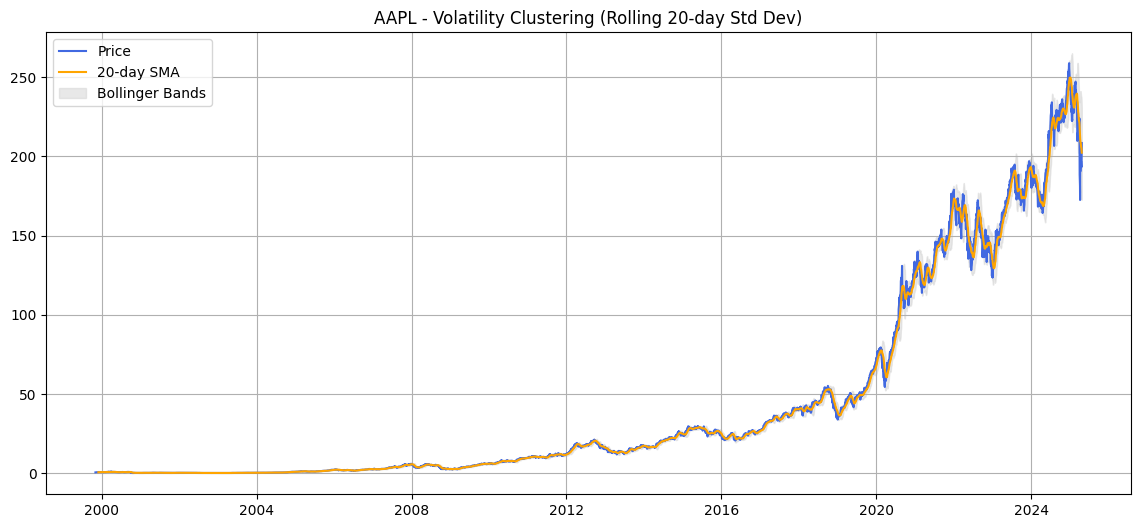


Sentiment vs Returns Correlations (AAPL):
  t+1 correlation: -0.0085
  t+2 correlation: -0.0084
  t+3 correlation: -0.0101


In [20]:
# Example run:
master_analysis('AAPL', 'C:/Users/Victor/Downloads/MSc DataScience/MasterThesis - GitHub/data/extract')

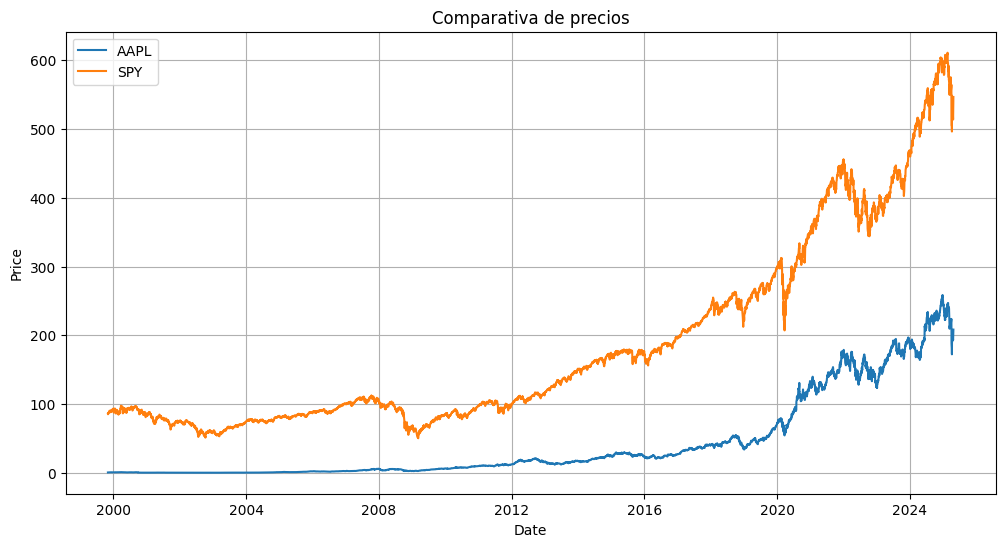

Price summary for AAPL (daily):
 count    6409.000000
mean       43.175581
std        62.975053
min         0.197396
25%         1.975765
50%        14.037559
75%        45.344700
max       258.735862
Name: adjusted_close, dtype: float64

Return summary for AAPL (daily):
 count    6408.000000
mean        0.001232
std         0.024578
min        -0.518692
25%        -0.009926
50%         0.000951
75%         0.012785
max         0.153288
Name: adjusted_close, dtype: float64


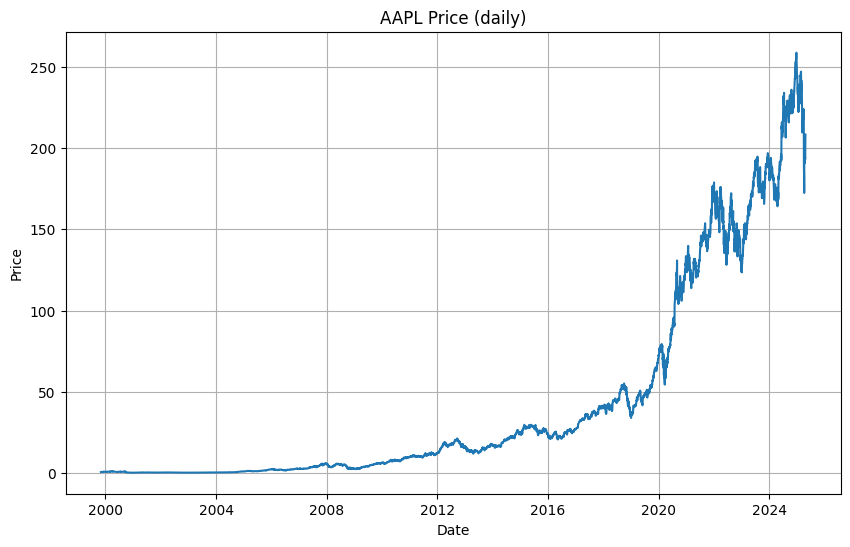

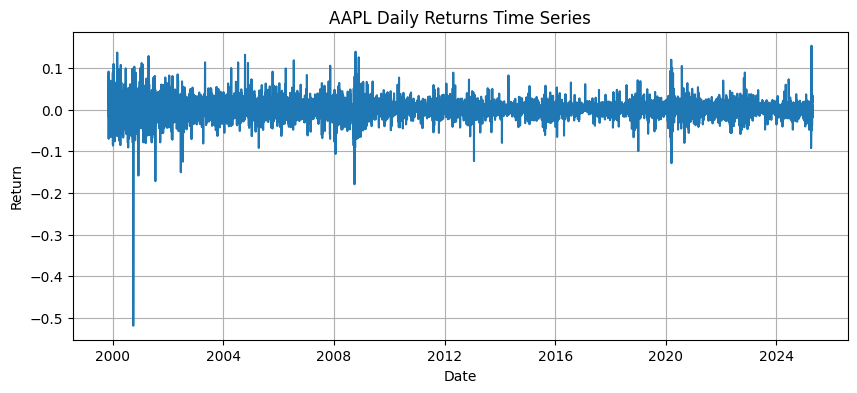

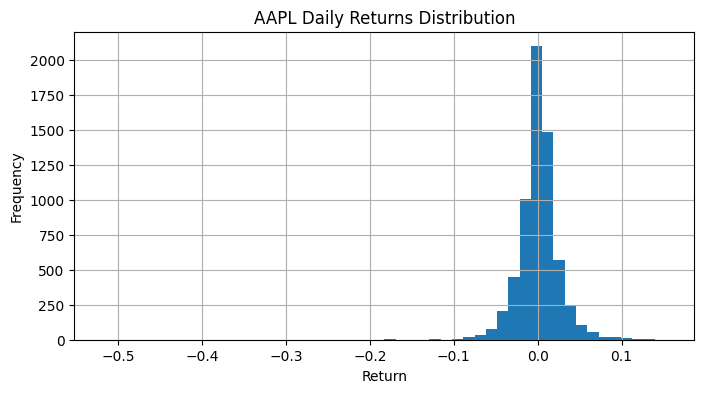

In [ ]:
import utils
import importlib
importlib.reload(utils)
from utils import load_prices, exploratory_data_analysis, 
# Carga precios usando el formato real de tu CSV
df_price = load_prices('AAPL', frequency='daily')

# Ejecuta EDA completo
exploratory_data_analysis('AAPL', price_freq='daily')



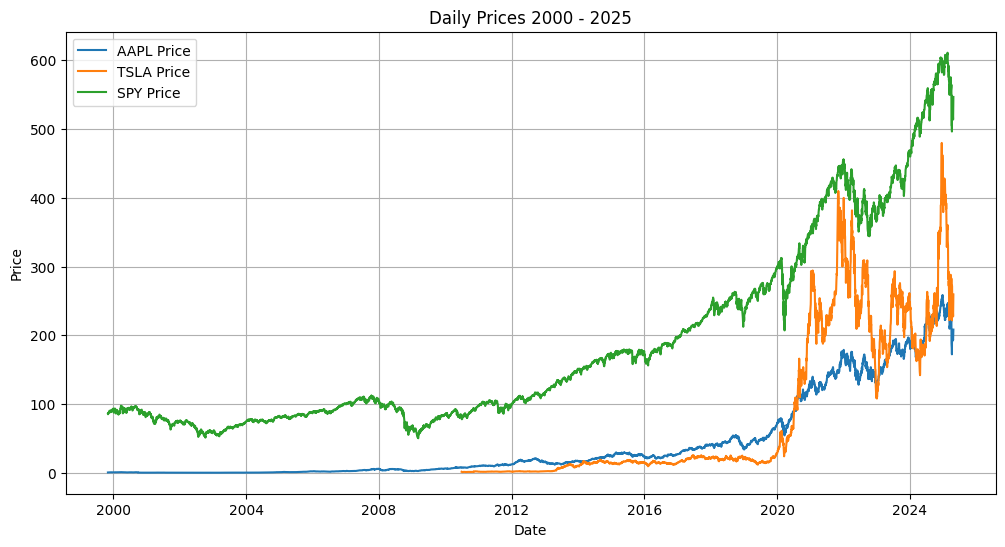

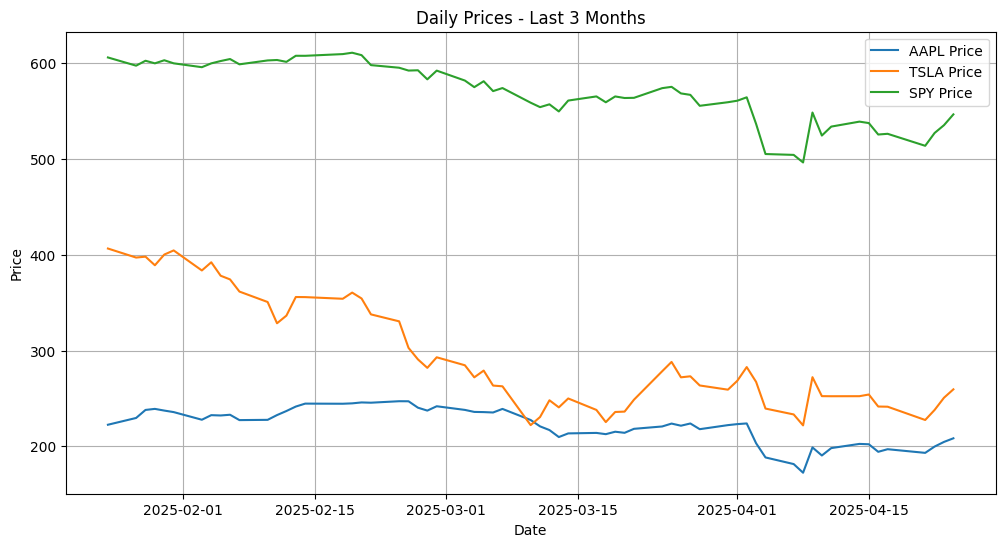

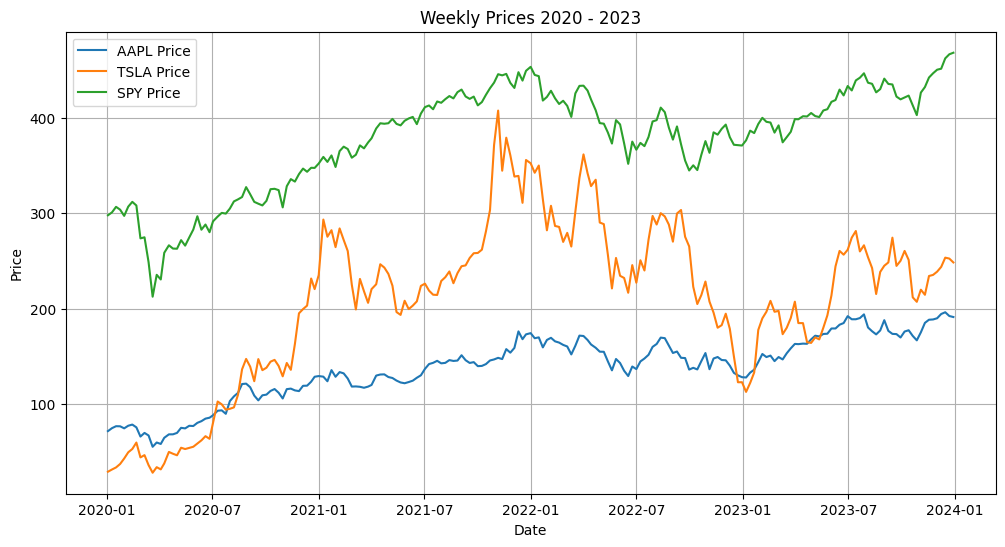

In [29]:
import utils
import importlib
importlib.reload(utils)
from utils import plot_multi_prices

# Ejemplo: comparar AAPL, TSLA y AMZN
plot_multi_prices(['AAPL','TSLA','SPY'], frequency='daily', title='Daily Prices 2000 - 2025')

# Comparativa para últimos 3 meses
plot_multi_prices(['AAPL','TSLA','SPY'], frequency='daily', months_back=3,
                  title='Daily Prices - Last 3 Months')

# Comparativa en rango concreto
plot_multi_prices(['AAPL','TSLA','SPY'], frequency='weekly',
                  start_date='2020-01-01', end_date='2023-12-31',
                  title='Weekly Prices 2020 - 2023')


## **Overview Time Series** - *Low to Moderate Volatility Tech Giants* - (2022 to 2025)

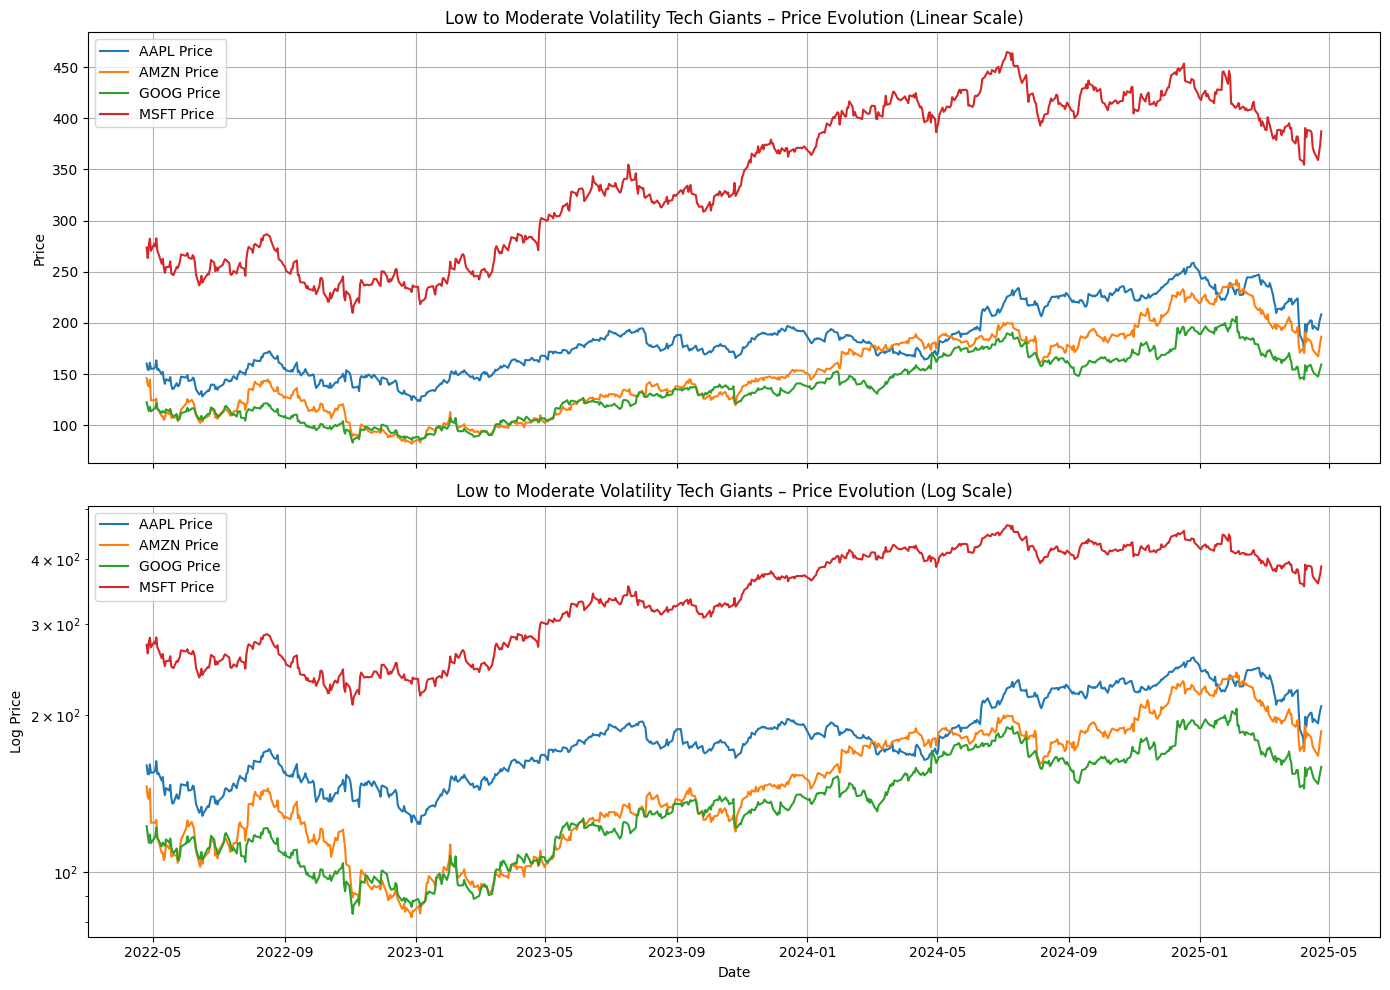

In [48]:
import utils
import importlib
importlib.reload(utils)
from utils import plot_prices_dual_scale

plot_prices_dual_scale(
    ['AAPL', 'AMZN', 'GOOG', 'MSFT'],
    frequency='daily',
    months_back=36,
    title='Low to Moderate Volatility Tech Giants – Price Evolution'
)


## **Overview Time Series** - *High Volatility Tech Leaders* - (2022 to 2025)

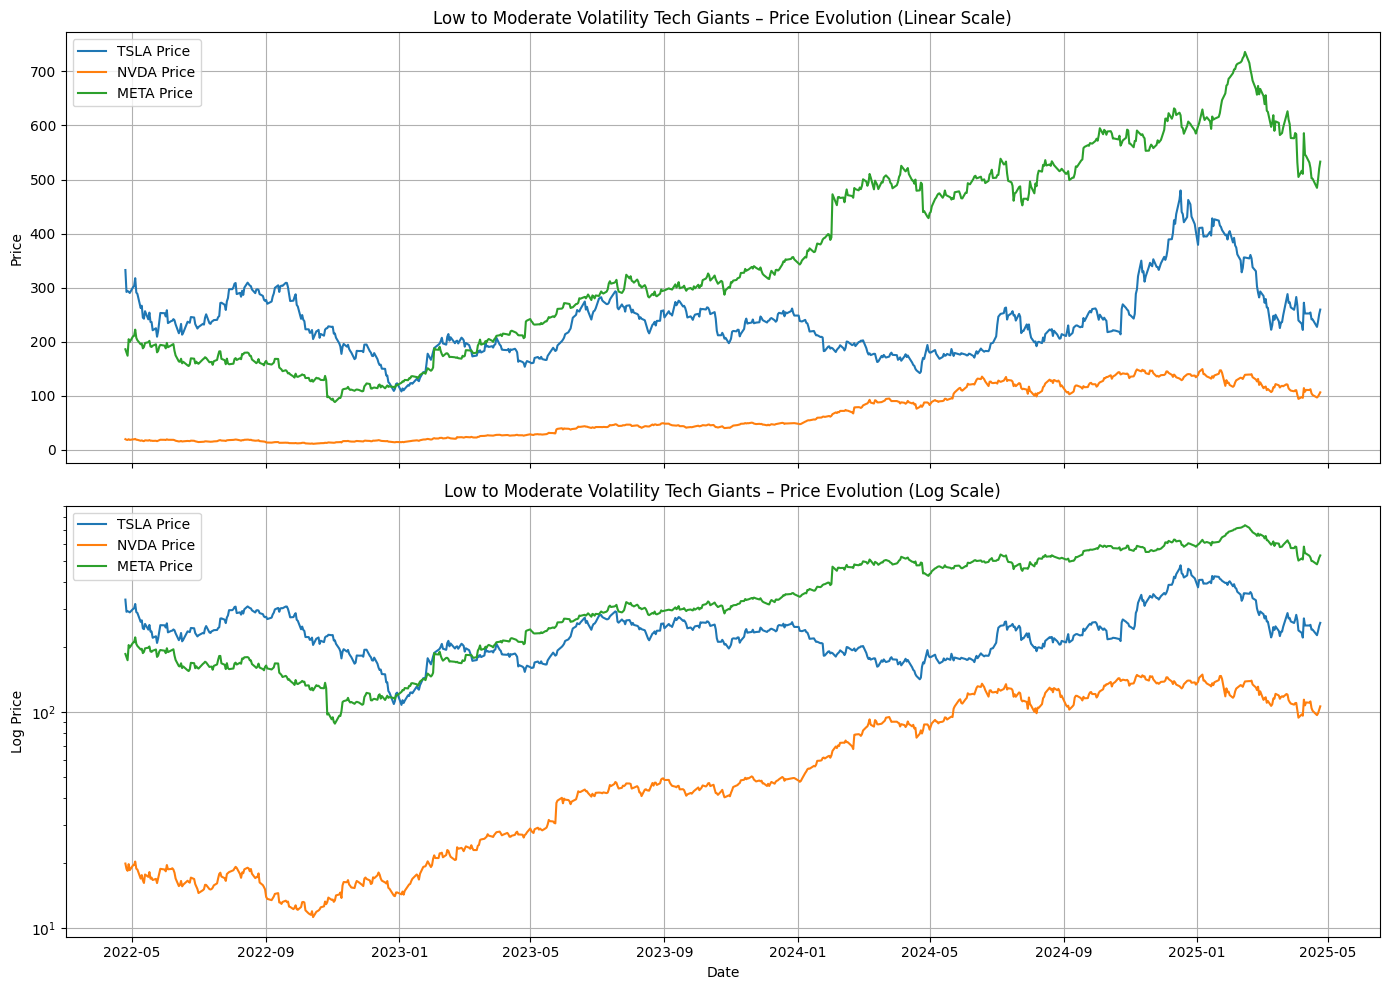

In [49]:
import utils
import importlib
importlib.reload(utils)
from utils import plot_prices_dual_scale

plot_prices_dual_scale(
    ['TSLA','NVDA','META'],
    frequency='daily',
    months_back=36,
    title='Low to Moderate Volatility Tech Giants – Price Evolution'
)



## **SMA/EMA Comparison** -  AAPL & TSLA

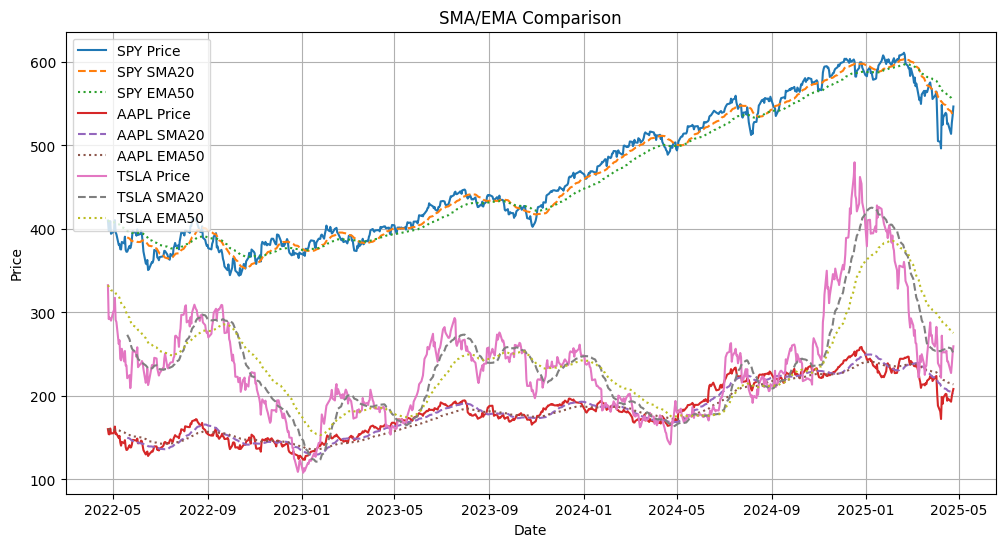

In [27]:
import utils
import importlib
importlib.reload(utils)
from utils import plot_multi_prices

# Compara AAPL y TSLA en últimos 6 meses, con SMA de 20 y EMA de 50 días
plot_multi_prices(
    ['SPY','AAPL','TSLA'],
    frequency='daily',
    months_back=36,
    sma_windows=[20],
    ema_spans=[50],
    title='SMA/EMA Comparison'
)

## **Correlations** -  AAPL & TSLA - Last 6M, **NOT FILTERED**

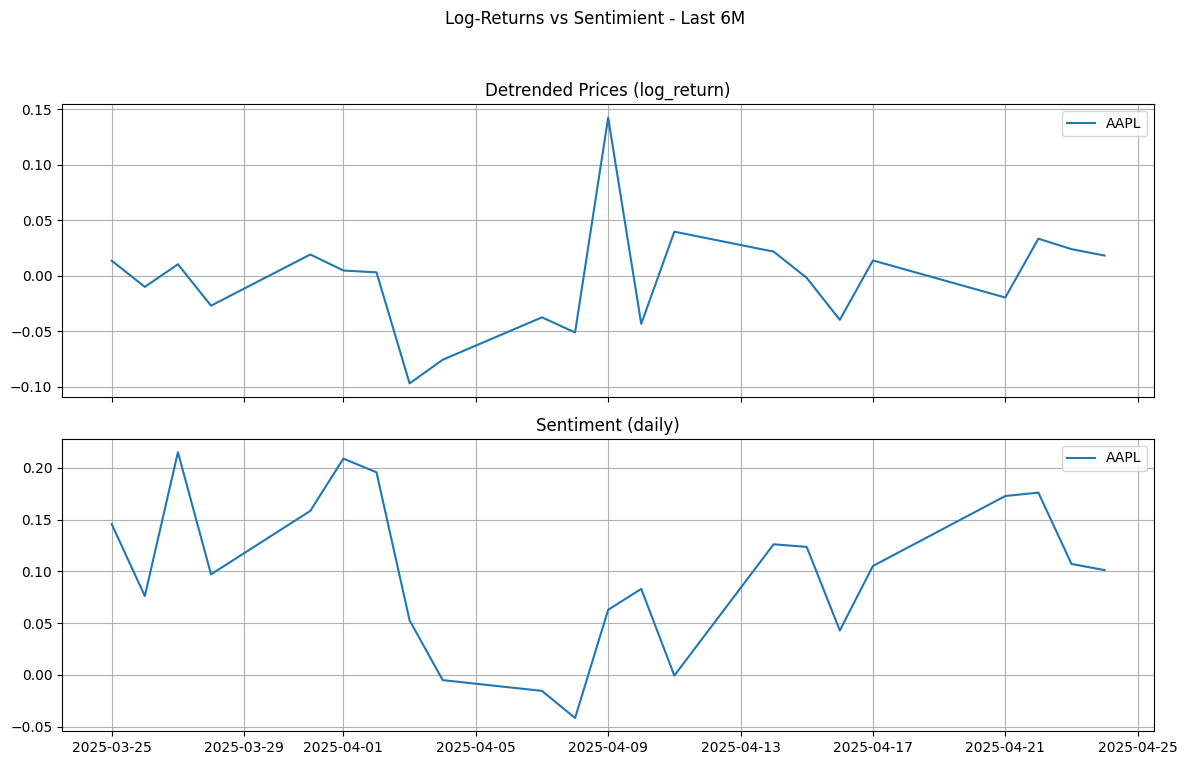

Correlation AAPL: 0.3173


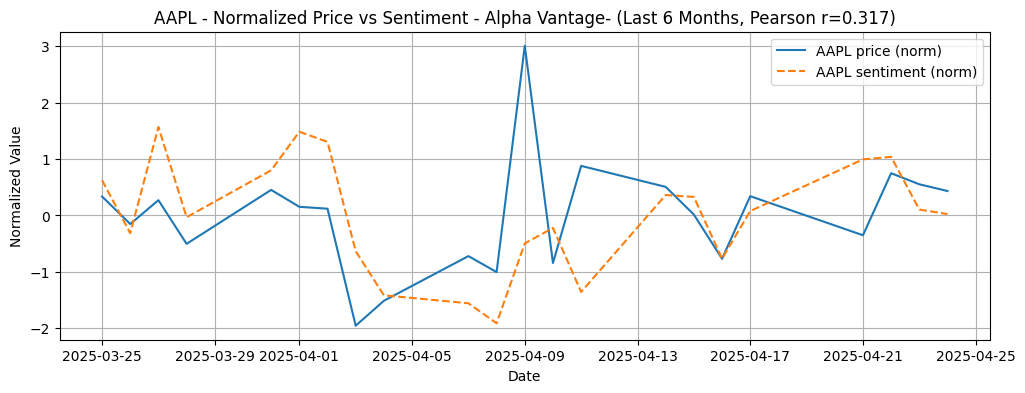

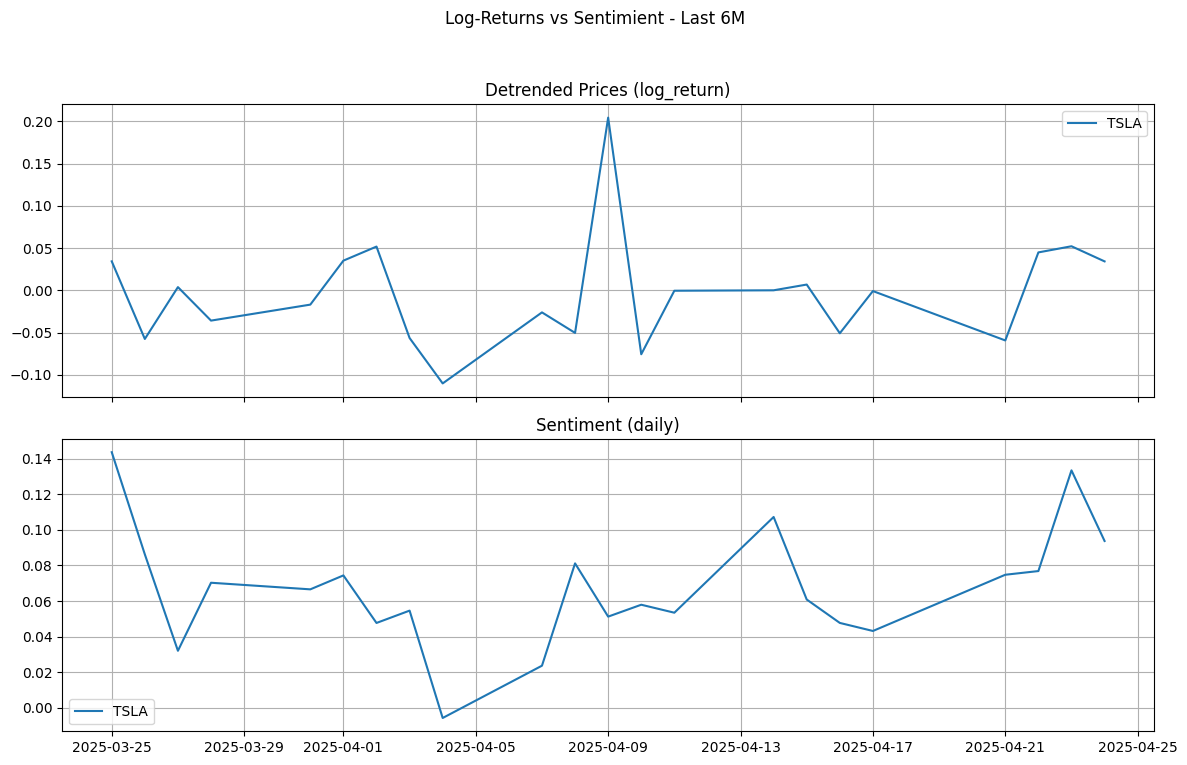

Correlation TSLA: 0.2725


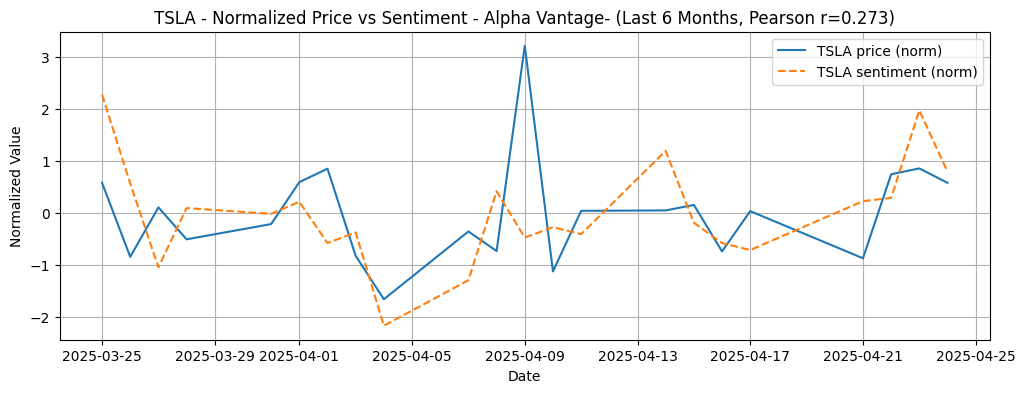

In [24]:
import utils
import importlib
importlib.reload(utils)
from utils import plot_stationary_with_sentiment

plot_stationary_with_sentiment(
    ['AAPL'],
    frequency='daily',
    detrend_method='log_return',
    sentiment_agg='daily',
    months_back=1,
    title='Log-Returns vs Sentimient - Last 6M'
)

plot_stationary_with_sentiment(
    ['TSLA'],
    frequency='daily',
    detrend_method='log_return',
    sentiment_agg='daily',
    months_back=1,
    title='Log-Returns vs Sentimient - Last 6M'
)

## **Correlations** -  AAPL & TSLA - Last 6M, **FILTERED**

In [ ]:
import utils
import importlib
importlib.reload(utils)
from utils import plot_stationary_with_sentiment

plot_stationary_with_sentiment(
    ['AAPL'],
    frequency='daily',
    detrend_method='log_return',
    sentiment_agg='daily',
    months_back=6,
    sentiment_lower=-0.2,
    sentiment_upper=0.2,
    min_relevance_score=0.5,
    title='Log-Returns vs Sentimiento Filtrado'
)
plot_stationary_with_sentiment(
    [' TSLA'],
    frequency='daily',
    detrend_method='log_return',
    sentiment_agg='daily',
    months_back=6,
    sentiment_lower=-0.2,
    sentiment_upper=0.2,
    min_relevance_score=0.5,
    title='Log-Returns vs Sentimiento Filtrado'
)

In [ ]:
import utils
import importlib
importlib.reload(utils)
from utils import explode_sentiment_data, aggregate_sentiment

# Obtén datos completos y filtrados (ej. últimos 90 días)
full_df, filt_df = explode_sentiment_data('AAPL', start_date='2025-02-01', end_date='2025-05-01')

# Agrega sentimiento
daily_agg, weekly_agg = aggregate_sentiment(filt_df)

print(daily_agg.head())
print(weekly_agg.head())


     day_date  daily_tss  daily_trs
0  2025-02-01  -0.132624   0.341635
1  2025-02-02   0.249324   0.392470
2  2025-02-03   0.088039   0.335417
3  2025-02-04   0.127503   0.308571
4  2025-02-05   0.178567   0.355624
    week_date  weekly_tss  weekly_trs
0  2025-01-27    0.085632    0.370684
1  2025-02-03    0.141770    0.306775
2  2025-02-10    0.156749    0.353772
3  2025-02-17    0.156214    0.304386
4  2025-02-24    0.101996    0.315888


In [25]:
import utils
import importlib
importlib.reload(utils)
from utils import explode_sentiment_data

# Explota y filtra sentiment y relevance
full_df, filtered_df = explode_sentiment_data(
    'AAPL',
    start_date='2025-01-01',
    end_date='2025-05-01',
    min_sentiment_score=0.1,
    min_relevance_score=0.5
)

full_df
filtered_df


time_published    day_date   week_date  ticker_sentiment_score  \
25301 2025-01-03 22:45:21  2025-01-03  2024-12-30                0.302443   
25304 2025-01-03 18:00:00  2025-01-03  2024-12-30                0.339699   
25306 2025-01-03 15:00:37  2025-01-03  2024-12-30                0.364935   
25316 2025-01-03 10:15:00  2025-01-03  2024-12-30                0.427587   
25318 2025-01-03 09:50:00  2025-01-03  2024-12-30                0.583995   
...                   ...         ...         ...                     ...   
27021 2025-04-29 20:37:58  2025-04-29  2025-04-28                0.172670   
27024 2025-04-29 15:00:47  2025-04-29  2025-04-28                0.330742   
27041 2025-04-28 15:59:00  2025-04-28  2025-04-28                0.355875   
27058 2025-04-28 06:48:17  2025-04-28  2025-04-28                0.222554   
27069 2025-04-27 10:15:00  2025-04-27  2025-04-21                0.113791   

       ticker_relevance_score  
25301                0.615462  
25304                0.785986  
25306                0.554751  
25316                0.718897  
25318                0.933929  
...                       ...  
27021                0.688096  
27024                0.503559  
27041                0.905834  
27058                0.772734  
27069                0.689652  

[302 rows x 5 columns]

AttributeError: 'NoneType' object has no attribute 'suptitle'

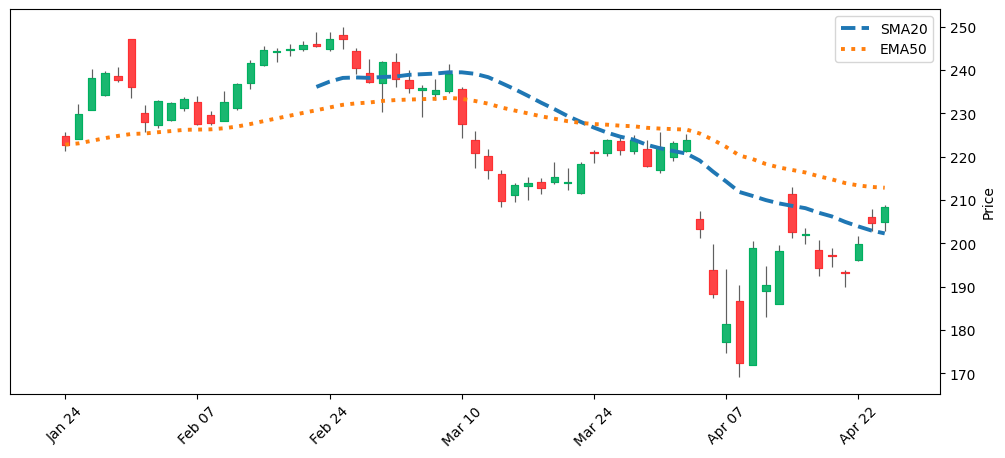

In [15]:
import utils
import importlib
importlib.reload(utils)
from utils import plot_multi_prices

plot_multi_prices(
    ['AAPL'],
    frequency='daily',
    months_back=3,
    sma_windows=[20],
    ema_spans=[50],
    candlestick=True,
    title='AAPL Candlestick Last 3M'
)